# Statistics and Politics 2: Data Analysis
#### Samuel Nguyen

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from scipy.stats import norm
import statsmodels.api as sm
from statsmodels.regression import linear_model 

I will be conducting an analysis on the US 2012 & 2016 elections below.

**Import dataframes:**

In [2]:
# Import data
demographic_df = pd.read_csv('data/S&P_II_clean_demographic_data.csv')
votes_2012_df = pd.read_csv('data/S&P_II_clean_presidential_2012_votes.csv')
votes_2016_df = pd.read_csv('data/S&P_II_clean_presidential_2016_votes.csv')

First I will double check the dataframe for correct datatypes and null values.

In [3]:
# Double check dataframe for correct data types
votes_2012_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6308 entries, 0 to 6307
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            6308 non-null   int64  
 1   state           6308 non-null   object 
 2   county          6308 non-null   object 
 3   FIPS            6308 non-null   int64  
 4   candidate       6308 non-null   object 
 5   party           6308 non-null   object 
 6   candidatevotes  6308 non-null   float64
 7   totalvotes      6308 non-null   int64  
 8   relative_votes  6308 non-null   float64
dtypes: float64(2), int64(3), object(4)
memory usage: 443.7+ KB


In [4]:
# Double check dataframe for correct data types
votes_2016_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6308 entries, 0 to 6307
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            6308 non-null   int64  
 1   state           6308 non-null   object 
 2   county          6308 non-null   object 
 3   FIPS            6308 non-null   int64  
 4   candidate       6308 non-null   object 
 5   party           6308 non-null   object 
 6   candidatevotes  6308 non-null   float64
 7   totalvotes      6308 non-null   int64  
 8   relative_votes  6308 non-null   float64
dtypes: float64(2), int64(3), object(4)
memory usage: 443.7+ KB


In [5]:
# Double check dataframe for correct data types
demographic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3110 entries, 0 to 3109
Data columns (total 17 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   state                                   3110 non-null   object 
 1   county                                  3110 non-null   object 
 2   FIPS                                    3110 non-null   int64  
 3   total_population                        933 non-null    float64
 4   citizen_voting_age_population           933 non-null    float64
 5   white_pct                               933 non-null    float64
 6   black_pct                               933 non-null    float64
 7   hispanic_pct                            933 non-null    float64
 8   foreign_born_pct                        933 non-null    float64
 9   female_pct                              933 non-null    float64
 10  age_29_and_under_pct                    933 non-null    floa

The dataframe data types look good, so I will join both the `votes_2012_df` and `votes_2016_df` on `demographic_df`. It looks like there are many null values in the `demographic_df` dataframe which will require cleaning. I will delete those null values after joining the dataframes.

In [6]:
# First aggregate the votes_2012_df and votes_2016_df (concatenate)
votes_merged_df = pd.concat([votes_2012_df, votes_2016_df])
votes_merged_df

,year,state,county,FIPS,candidate,party,candidatevotes,totalvotes,relative_votes
0,2012,Alabama,Autauga,1001,Barack Obama,democrat,6363.0,23932,26.800607
1,2012,Alabama,Autauga,1001,Mitt Romney,republican,17379.0,23932,73.199393
2,2012,Alabama,Baldwin,1003,Barack Obama,democrat,18424.0,85338,21.819043
3,2012,Alabama,Baldwin,1003,Mitt Romney,republican,66016.0,85338,78.180957
4,2012,Alabama,Barbour,1005,Barack Obama,democrat,5912.0,11509,51.579131
...,...,...,...,...,...,...,...,...,...
6303,2016,Alaska,District 39,2039,Donald Trump,republican,1405.0,5639,30.899494
6304,2016,Alaska,District 40,2040,Hillary Clinton,democrat,2338.0,4610,62.934051
6305,2016,Alaska,District 40,2040,Donald Trump,republican,1377.0,4610,37.065949
6306,2016,Alaska,District 99,2099,Hillary Clinton,democrat,274.0,5056,87.261146


In [7]:
# Merge demographic_df and votes_merged_df on 'FIPS' column
demo_votes_df = pd.merge(votes_merged_df,demographic_df, on = ['FIPS'], how = 'left')
demo_votes_df

,year,state_x,county_x,FIPS,candidate,party,candidatevotes,totalvotes,relative_votes,state_y,...,hispanic_pct,foreign_born_pct,female_pct,age_29_and_under_pct,age_65_and_older_pct,median_household_income,unemployed_pct_in_civilian_labor_force,less_than_highschool_pct,less_than_college_pct,rural population_pct
0,2012,Alabama,Autauga,1001,Barack Obama,democrat,6363.0,23932,26.800607,Alabama,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2012,Alabama,Autauga,1001,Mitt Romney,republican,17379.0,23932,73.199393,Alabama,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2012,Alabama,Baldwin,1003,Barack Obama,democrat,18424.0,85338,21.819043,Alabama,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2012,Alabama,Baldwin,1003,Mitt Romney,republican,66016.0,85338,78.180957,Alabama,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2012,Alabama,Barbour,1005,Barack Obama,democrat,5912.0,11509,51.579131,Alabama,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12611,2016,Alaska,District 39,2039,Donald Trump,republican,1405.0,5639,30.899494,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12612,2016,Alaska,District 40,2040,Hillary Clinton,democrat,2338.0,4610,62.934051,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12613,2016,Alaska,District 40,2040,Donald Trump,republican,1377.0,4610,37.065949,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12614,2016,Alaska,District 99,2099,Hillary Clinton,democrat,274.0,5056,87.261146,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


After merging the data, it seems the `state` and `county` columns were duplicated. I will go ahead and delete these duplicated columns as well as any additional duplicated columns and rows.

In [8]:
# Delete duplicated state and county columns
demo_votes_df.drop(['state_y','county_y'], axis = 1, inplace = True)

# Rename state and county columns
demo_votes_df.rename(columns = {'state_x': 'state', 'county_x': 'county'}, inplace = True)

# Check for additional duplicate columns and rows
# Columns
print(f'Duplicated columns: {demo_votes_df.T.duplicated().any()}')
# Rows 
print(f'Duplicated rows: {demo_votes_df.duplicated().any()}')

Duplicated columns: False
Duplicated rows: False


As mentioned earlier, let's check for the null values, and proceed with deleting any null values.

In [9]:
# Check for null values
demo_votes_df.isna().mean()*100

year                                       0.000000
state                                      0.000000
county                                     0.000000
FIPS                                       0.000000
candidate                                  0.000000
party                                      0.000000
candidatevotes                             0.000000
totalvotes                                 0.000000
relative_votes                             0.000000
total_population                          70.418516
citizen_voting_age_population             70.418516
white_pct                                 70.418516
black_pct                                 70.418516
hispanic_pct                              70.418516
foreign_born_pct                          70.418516
female_pct                                70.418516
age_29_and_under_pct                      70.418516
age_65_and_older_pct                      70.418516
median_household_income                   70.418516
unemployed_p

Null values were found in the following columns:

* `total_population`                          70.418516%
* `citizen_voting_age_population`             70.418516%
* `white_pct`                                 70.418516%
* `black_pct`                                 70.418516%
* `hispanic_pct`                              70.418516%
* `foreign_born_pct`                          70.418516%
* `female_pct`                                70.418516%
* `age_29_and_under_pct`                      70.418516%
* `age_65_and_older_pct`                      70.418516%
* `median_household_income`                   70.418516%
* `unemployed_pct_in_civilian_labor_force`    70.418516%
* `less_than_highschool_pct`                 70.418516%
* `less_than_college_pct`                     70.418516%
* `rural population_pct`                      70.418516%

In [10]:
# Drop null values
cleaned_demovotes_df = demo_votes_df.dropna()
cleaned_demovotes_df

,year,state,county,FIPS,candidate,party,candidatevotes,totalvotes,relative_votes,total_population,...,hispanic_pct,foreign_born_pct,female_pct,age_29_and_under_pct,age_65_and_older_pct,median_household_income,unemployed_pct_in_civilian_labor_force,less_than_highschool_pct,less_than_college_pct,rural population_pct
16,2012,Alabama,Chambers,1017,Barack Obama,democrat,6871.0,14611,47.396013,34018.0,...,0.435064,0.990652,52.087130,35.872185,18.387324,36027.0,7.489945,19.736732,87.515721,49.148034
17,2012,Alabama,Chambers,1017,Mitt Romney,republican,7626.0,14611,52.603987,34018.0,...,0.435064,0.990652,52.087130,35.872185,18.387324,36027.0,7.489945,19.736732,87.515721,49.148034
18,2012,Alabama,Cherokee,1019,Barack Obama,democrat,2132.0,9779,22.120772,25897.0,...,3.823285,0.725953,50.252925,32.710353,20.322817,38925.0,5.855731,18.717235,86.038301,85.736273
19,2012,Alabama,Cherokee,1019,Mitt Romney,republican,7506.0,9779,77.879228,25897.0,...,3.823285,0.725953,50.252925,32.710353,20.322817,38925.0,5.855731,18.717235,86.038301,85.736273
24,2012,Alabama,Clarke,1025,Barack Obama,democrat,6334.0,13851,45.885251,24847.0,...,0.173059,0.466857,52.758884,36.604017,18.062543,32735.0,17.083333,18.957819,87.862766,75.980335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12517,2016,Wyoming,Park,56029,Donald Trump,republican,11115.0,15095,81.428571,29083.0,...,5.618403,2.685418,50.802875,35.532785,19.444349,61185.0,3.786077,5.748368,67.998625,44.240383
12522,2016,Wyoming,Sublette,56035,Hillary Clinton,democrat,644.0,4390,15.889465,10032.0,...,7.814992,2.053429,46.949761,36.393541,13.337321,76004.0,2.786971,4.658830,75.645069,100.000000
12523,2016,Wyoming,Sublette,56035,Donald Trump,republican,3409.0,4390,84.110535,10032.0,...,7.814992,2.053429,46.949761,36.393541,13.337321,76004.0,2.786971,4.658830,75.645069,100.000000
12530,2016,Wyoming,Washakie,56043,Hillary Clinton,democrat,532.0,3814,15.451641,8351.0,...,13.962400,3.783978,51.359119,34.774279,19.650341,46212.0,7.441860,12.577108,78.923920,35.954529


After deleting the null values, it looks like the index needs to be reset.

In [11]:
# Reset index
cleaned_demovotes_df = cleaned_demovotes_df.reset_index().drop(columns = 'index')

In [12]:
#sanity check
cleaned_demovotes_df

,year,state,county,FIPS,candidate,party,candidatevotes,totalvotes,relative_votes,total_population,...,hispanic_pct,foreign_born_pct,female_pct,age_29_and_under_pct,age_65_and_older_pct,median_household_income,unemployed_pct_in_civilian_labor_force,less_than_highschool_pct,less_than_college_pct,rural population_pct
0,2012,Alabama,Chambers,1017,Barack Obama,democrat,6871.0,14611,47.396013,34018.0,...,0.435064,0.990652,52.087130,35.872185,18.387324,36027.0,7.489945,19.736732,87.515721,49.148034
1,2012,Alabama,Chambers,1017,Mitt Romney,republican,7626.0,14611,52.603987,34018.0,...,0.435064,0.990652,52.087130,35.872185,18.387324,36027.0,7.489945,19.736732,87.515721,49.148034
2,2012,Alabama,Cherokee,1019,Barack Obama,democrat,2132.0,9779,22.120772,25897.0,...,3.823285,0.725953,50.252925,32.710353,20.322817,38925.0,5.855731,18.717235,86.038301,85.736273
3,2012,Alabama,Cherokee,1019,Mitt Romney,republican,7506.0,9779,77.879228,25897.0,...,3.823285,0.725953,50.252925,32.710353,20.322817,38925.0,5.855731,18.717235,86.038301,85.736273
4,2012,Alabama,Clarke,1025,Barack Obama,democrat,6334.0,13851,45.885251,24847.0,...,0.173059,0.466857,52.758884,36.604017,18.062543,32735.0,17.083333,18.957819,87.862766,75.980335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3727,2016,Wyoming,Park,56029,Donald Trump,republican,11115.0,15095,81.428571,29083.0,...,5.618403,2.685418,50.802875,35.532785,19.444349,61185.0,3.786077,5.748368,67.998625,44.240383
3728,2016,Wyoming,Sublette,56035,Hillary Clinton,democrat,644.0,4390,15.889465,10032.0,...,7.814992,2.053429,46.949761,36.393541,13.337321,76004.0,2.786971,4.658830,75.645069,100.000000
3729,2016,Wyoming,Sublette,56035,Donald Trump,republican,3409.0,4390,84.110535,10032.0,...,7.814992,2.053429,46.949761,36.393541,13.337321,76004.0,2.786971,4.658830,75.645069,100.000000
3730,2016,Wyoming,Washakie,56043,Hillary Clinton,democrat,532.0,3814,15.451641,8351.0,...,13.962400,3.783978,51.359119,34.774279,19.650341,46212.0,7.441860,12.577108,78.923920,35.954529


Data looks good! After cleaning, there are 23 columns, and 3732 rows.

## Let's analyze what features are correlated with republican vote share

I determined strength of correlation using the absolute value of the correlation coefficient `r` below:

* 0 < `r` <= 0.3, then **no** correlation 
* 0.3 < `r` <= 0.5, then **weak** correlation
* 0.5 < `r` <= 0.7, then **moderate** correlation
* 0.7 < `r` <= 1, then **strong** correlation

This interpretation of correlation was determined from: https://www.dummies.com/education/math/statistics/how-to-interpret-a-correlation-coefficient-r/

As we are interested in the republican vote share, I will filter the `cleaned_demovotes_df` dataframe by the republican party. 

In [13]:
# Filter data by republican party

republican_df = cleaned_demovotes_df.loc[cleaned_demovotes_df['party'] == 'republican']
republican_df


,year,state,county,FIPS,candidate,party,candidatevotes,totalvotes,relative_votes,total_population,...,hispanic_pct,foreign_born_pct,female_pct,age_29_and_under_pct,age_65_and_older_pct,median_household_income,unemployed_pct_in_civilian_labor_force,less_than_highschool_pct,less_than_college_pct,rural population_pct
1,2012,Alabama,Chambers,1017,Mitt Romney,republican,7626.0,14611,52.603987,34018.0,...,0.435064,0.990652,52.087130,35.872185,18.387324,36027.0,7.489945,19.736732,87.515721,49.148034
3,2012,Alabama,Cherokee,1019,Mitt Romney,republican,7506.0,9779,77.879228,25897.0,...,3.823285,0.725953,50.252925,32.710353,20.322817,38925.0,5.855731,18.717235,86.038301,85.736273
5,2012,Alabama,Clarke,1025,Mitt Romney,republican,7470.0,13851,54.114749,24847.0,...,0.173059,0.466857,52.758884,36.604017,18.062543,32735.0,17.083333,18.957819,87.862766,75.980335
7,2012,Alabama,Clay,1027,Mitt Romney,republican,4817.0,6662,73.051259,13483.0,...,3.107617,1.891270,51.553808,34.843877,19.402210,38815.0,6.591530,25.386407,88.937116,100.000000
9,2012,Alabama,Cleburne,1029,Mitt Romney,republican,5272.0,6305,84.446580,14991.0,...,2.328064,1.747715,50.483624,36.141685,18.164232,36316.0,7.173601,25.815165,88.471927,100.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3723,2016,Wyoming,Converse,56009,Donald Trump,republican,5520.0,6654,89.204913,14223.0,...,7.691767,2.706883,49.933207,38.515081,13.668003,66737.0,5.282284,9.758393,84.468152,55.360370
3725,2016,Wyoming,Fremont,56013,Donald Trump,republican,11167.0,17023,72.668706,40683.0,...,6.779244,1.339626,49.907824,39.751247,16.409803,53559.0,7.344324,8.537172,77.648670,51.424370
3727,2016,Wyoming,Park,56029,Donald Trump,republican,11115.0,15095,81.428571,29083.0,...,5.618403,2.685418,50.802875,35.532785,19.444349,61185.0,3.786077,5.748368,67.998625,44.240383
3729,2016,Wyoming,Sublette,56035,Donald Trump,republican,3409.0,4390,84.110535,10032.0,...,7.814992,2.053429,46.949761,36.393541,13.337321,76004.0,2.786971,4.658830,75.645069,100.000000


Now, let's check for correlation between republican vote shares and the other data columns.

In [14]:
# Create a new variable containing all numerical columns of republican_df
# Year and FIPS are technically categorical data, so they are omitted from this new variable.
numeric_columns = republican_df[['candidatevotes','totalvotes','relative_votes','total_population','citizen_voting_age_population','white_pct','black_pct','hispanic_pct','foreign_born_pct','female_pct',
                                      'age_29_and_under_pct','age_65_and_older_pct','median_household_income','unemployed_pct_in_civilian_labor_force','less_than_highschool_pct','less_than_college_pct','rural population_pct']]

# Check correlation
numeric_columns.corr()


,candidatevotes,totalvotes,relative_votes,total_population,citizen_voting_age_population,white_pct,black_pct,hispanic_pct,foreign_born_pct,female_pct,age_29_and_under_pct,age_65_and_older_pct,median_household_income,unemployed_pct_in_civilian_labor_force,less_than_highschool_pct,less_than_college_pct,rural population_pct
candidatevotes,1.000000,0.939378,-0.262760,0.907649,0.919872,-0.179994,0.071045,0.124915,0.469731,0.166815,0.165484,-0.289736,0.411218,0.000238,-0.185446,-0.455684,-0.540018
totalvotes,0.939378,1.000000,-0.366032,0.979789,0.987101,-0.238047,0.108201,0.152465,0.558498,0.168768,0.150002,-0.275221,0.391271,0.015746,-0.159789,-0.478791,-0.518018
relative_votes,-0.262760,-0.366032,1.000000,-0.349383,-0.356596,0.471067,-0.413321,-0.119116,-0.311414,-0.129022,-0.148778,0.207076,-0.108296,-0.257122,0.061878,0.388774,0.396481
total_population,0.907649,0.979789,-0.349383,1.000000,0.996531,-0.265520,0.108339,0.185945,0.582962,0.154042,0.170000,-0.283008,0.344496,0.027858,-0.113814,-0.425942,-0.494773
citizen_voting_age_population,0.919872,0.987101,-0.356596,0.996531,1.000000,-0.255620,0.112145,0.170119,0.564972,0.162174,0.164730,-0.281172,0.352328,0.028960,-0.129318,-0.439311,-0.507563
white_pct,-0.179994,-0.238047,0.471067,-0.265520,-0.255620,1.000000,-0.622416,-0.595445,-0.496407,0.012581,-0.434167,0.371427,0.167044,-0.441003,-0.502906,-0.032551,0.292139
black_pct,0.071045,0.108201,-0.413321,0.108339,0.112145,-0.622416,1.000000,-0.118687,-0.004336,0.075404,0.152445,-0.210386,-0.309366,0.474345,0.362509,0.125704,-0.108268
hispanic_pct,0.124915,0.152465,-0.119116,0.185945,0.170119,-0.595445,-0.118687,1.000000,0.643175,-0.093274,0.307456,-0.194318,0.063710,0.025010,0.351931,-0.017954,-0.249578
foreign_born_pct,0.469731,0.558498,-0.311414,0.582962,0.564972,-0.496407,-0.004336,0.643175,1.000000,-0.023570,0.313627,-0.333765,0.348971,-0.009198,0.169079,-0.377257,-0.477576
female_pct,0.166815,0.168768,-0.129022,0.154042,0.162174,0.012581,0.075404,-0.093274,-0.023570,1.000000,0.044886,0.069626,-0.012117,0.118157,-0.095479,-0.173810,-0.182066


The table shown above allows you to view the correlation between each pair of variables. Correlation always falls between a range of [-1,1]:

* Correlation coefficient of **`-1`** indicates a perfect negative correlation
* Correlation coefficient of **`0`** indicates no correlation
* Correlation coefficient of **`1`** indicates a perfect positive correlation

As this table is hard to interpret, let's check strength of correlation using a heatmap.

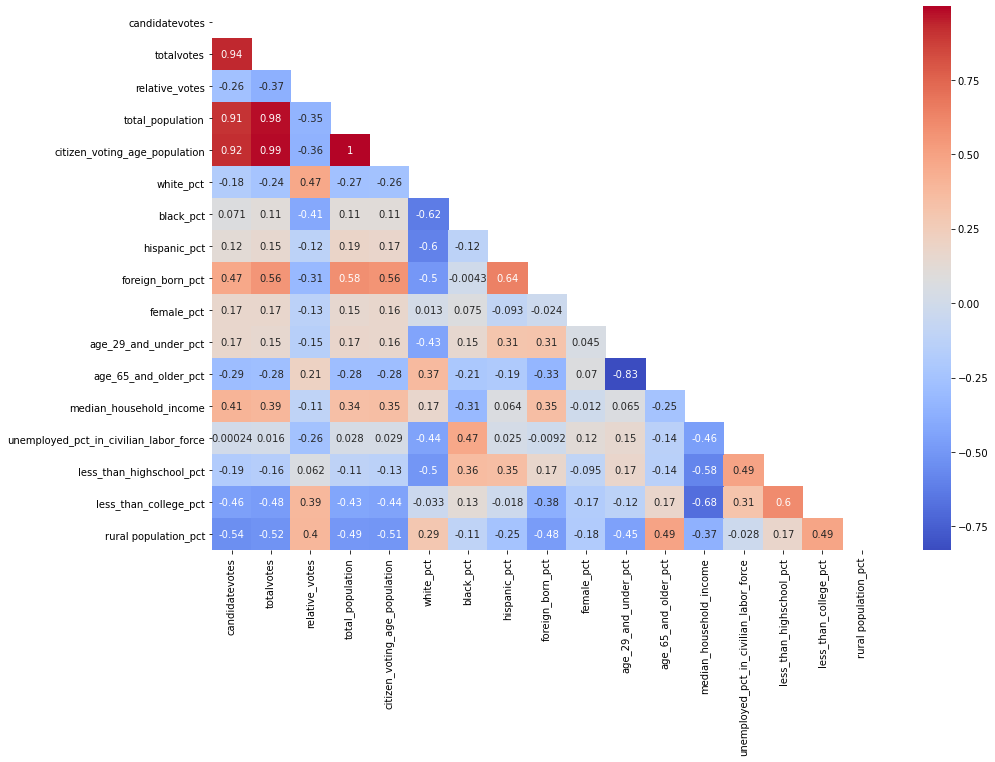

In [15]:
# Correlation of the variables in a heatmap

plt.figure(figsize=(15,10))
matrix = np.triu(numeric_columns.corr())
sns.heatmap(numeric_columns.corr(), annot=True, mask=matrix, cmap='coolwarm')
plt.show()

Let's look at only the correlations with relative_votes

In [16]:
# calculate correlation with relative_votes
df_corr = republican_df.corr()
df_corr['relative_votes'].sort_values()

black_pct                                -0.413321
totalvotes                               -0.366032
citizen_voting_age_population            -0.356596
total_population                         -0.349383
foreign_born_pct                         -0.311414
candidatevotes                           -0.262760
unemployed_pct_in_civilian_labor_force   -0.257122
age_29_and_under_pct                     -0.148778
female_pct                               -0.129022
hispanic_pct                             -0.119116
median_household_income                  -0.108296
FIPS                                      0.000526
less_than_highschool_pct                  0.061878
year                                      0.195831
age_65_and_older_pct                      0.207076
less_than_college_pct                     0.388774
rural population_pct                      0.396481
white_pct                                 0.471067
relative_votes                            1.000000
Name: relative_votes, dtype: fl

In [17]:
#Lets check for statistical significance for these correlations

for col in numeric_columns:
    corr, pvalue = stats.pearsonr(numeric_columns[col],numeric_columns['relative_votes'])
    print(f"The p-value between relative_votes and {[col]} is {pvalue}")

The p-value between relative_votes and ['candidatevotes'] is 7.700209034715923e-31
The p-value between relative_votes and ['totalvotes'] is 3.0065891415134406e-60
The p-value between relative_votes and ['relative_votes'] is 0.0
The p-value between relative_votes and ['total_population'] is 1.064145421348313e-54
The p-value between relative_votes and ['citizen_voting_age_population'] is 4.6081166213138486e-57
The p-value between relative_votes and ['white_pct'] is 1.0855283467343866e-103
The p-value between relative_votes and ['black_pct'] is 6.6518888844871e-78
The p-value between relative_votes and ['hispanic_pct'] is 2.4638352802797406e-07
The p-value between relative_votes and ['foreign_born_pct'] is 3.0314956262358322e-43
The p-value between relative_votes and ['female_pct'] is 2.231387870347002e-08
The p-value between relative_votes and ['age_29_and_under_pct'] is 1.0576153491864998e-10
The p-value between relative_votes and ['age_65_and_older_pct'] is 1.6064931645110478e-19
The p

Using the data obtained from above, the following information was found:

Weak correlation with relative_votes: 

* **`less_than_college_pct`**                     0.388774
* **`rural population_pct`**                      0.396481
* **`white_pct`**                                 0.471067
* **`black_pct`**                                -0.413321
* **`totalvotes`**                               -0.366032
* **`citizen_voting_age_population`**            -0.356596
* **`total_population`**                         -0.349383
* **`foreign_born_pct`**                         -0.311414

No correlation was found between any other of the predictor variables. They are mentioned below for reference:

* **`candidatevotes`**                           -0.262760
* **`unemployed_pct_in_civilian_labor_force`**   -0.257122
* **`age_29_and_under_pct`**                     -0.148778
* **`female_pct`**                               -0.129022
* **`hispanic_pct`**                             -0.119116
* **`median_household_income`**                  -0.108296
* **`FIPS`**                                      0.000526
* **`less_than_highschool_pct`**                  0.061878
* **`year`**                                      0.195831
* **`age_65_and_older_pct`**                      0.207076

Correlation between `relative_votes` and every data column was seen to be statistically significant at p-value < 0.05. It is interesting that age and `median_household_income` did not have any correlation between republican vote shares. Although `white_pct` and `black_pct` were determined to have weak correlation with republican vote share, it should be noted that these columns had the highest correlation coefficients at 0.47 and 0.41, respectively. This could be worth investigating as these columns had values that were close to a moderate strength of correlation. 

Now that we have determined the correlation between `relative_votes` and other data columns, I will break it down by election year to see if this pattern appears in both elections.

### 2012 Elections:

In [18]:
# Filter by 2012 year
republican_2012_df = cleaned_demovotes_df.loc[(cleaned_demovotes_df['party'] == 'republican') & (cleaned_demovotes_df['year'] == 2012)]
#sanity check
republican_2012_df

,year,state,county,FIPS,candidate,party,candidatevotes,totalvotes,relative_votes,total_population,...,hispanic_pct,foreign_born_pct,female_pct,age_29_and_under_pct,age_65_and_older_pct,median_household_income,unemployed_pct_in_civilian_labor_force,less_than_highschool_pct,less_than_college_pct,rural population_pct
1,2012,Alabama,Chambers,1017,Mitt Romney,republican,7626.0,14611,52.603987,34018.0,...,0.435064,0.990652,52.087130,35.872185,18.387324,36027.0,7.489945,19.736732,87.515721,49.148034
3,2012,Alabama,Cherokee,1019,Mitt Romney,republican,7506.0,9779,77.879228,25897.0,...,3.823285,0.725953,50.252925,32.710353,20.322817,38925.0,5.855731,18.717235,86.038301,85.736273
5,2012,Alabama,Clarke,1025,Mitt Romney,republican,7470.0,13851,54.114749,24847.0,...,0.173059,0.466857,52.758884,36.604017,18.062543,32735.0,17.083333,18.957819,87.862766,75.980335
7,2012,Alabama,Clay,1027,Mitt Romney,republican,4817.0,6662,73.051259,13483.0,...,3.107617,1.891270,51.553808,34.843877,19.402210,38815.0,6.591530,25.386407,88.937116,100.000000
9,2012,Alabama,Cleburne,1029,Mitt Romney,republican,5272.0,6305,84.446580,14991.0,...,2.328064,1.747715,50.483624,36.141685,18.164232,36316.0,7.173601,25.815165,88.471927,100.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1857,2012,Wyoming,Converse,56009,Mitt Romney,republican,5043.0,6343,82.240705,14223.0,...,7.691767,2.706883,49.933207,38.515081,13.668003,66737.0,5.282284,9.758393,84.468152,55.360370
1859,2012,Wyoming,Fremont,56013,Mitt Romney,republican,11075.0,16939,67.497562,40683.0,...,6.779244,1.339626,49.907824,39.751247,16.409803,53559.0,7.344324,8.537172,77.648670,51.424370
1861,2012,Wyoming,Park,56029,Mitt Romney,republican,11234.0,14608,79.330556,29083.0,...,5.618403,2.685418,50.802875,35.532785,19.444349,61185.0,3.786077,5.748368,67.998625,44.240383
1863,2012,Wyoming,Sublette,56035,Mitt Romney,republican,3472.0,4376,81.906110,10032.0,...,7.814992,2.053429,46.949761,36.393541,13.337321,76004.0,2.786971,4.658830,75.645069,100.000000


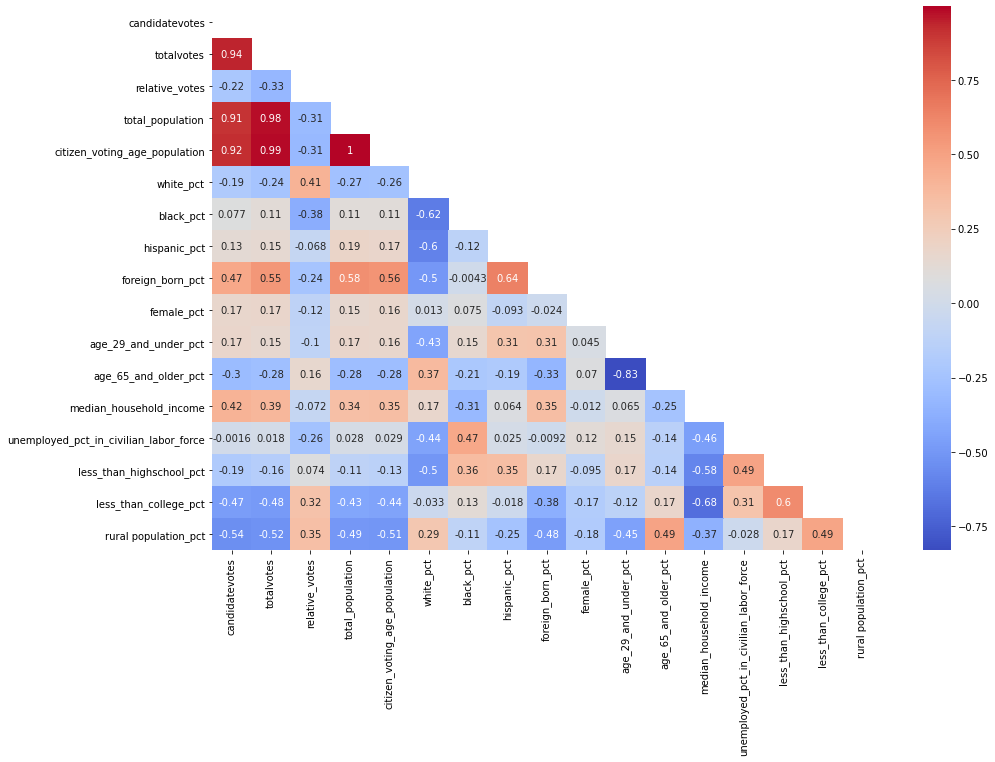

In [19]:
# Filter by numerical(float/int) columns 
numeric_columns_2012 = republican_2012_df[['candidatevotes','totalvotes','relative_votes','total_population','citizen_voting_age_population','white_pct','black_pct','hispanic_pct','foreign_born_pct','female_pct',
                                      'age_29_and_under_pct','age_65_and_older_pct','median_household_income','unemployed_pct_in_civilian_labor_force','less_than_highschool_pct','less_than_college_pct','rural population_pct']]

# Check correlation using a heatmap
plt.figure(figsize=(15,10))
matrix = np.triu(numeric_columns_2012.corr())
sns.heatmap(numeric_columns_2012.corr(), annot=True, mask=matrix, cmap='coolwarm')
plt.show()

In [20]:
# Let's only look at the correlations with relative_votes
republican_2012_corr = republican_2012_df.corr()
republican_2012_corr['relative_votes'].sort_values()

black_pct                                -0.384877
totalvotes                               -0.327836
citizen_voting_age_population            -0.314536
total_population                         -0.307191
unemployed_pct_in_civilian_labor_force   -0.255425
foreign_born_pct                         -0.243467
candidatevotes                           -0.220805
female_pct                               -0.115581
age_29_and_under_pct                     -0.102258
median_household_income                  -0.072033
hispanic_pct                             -0.067925
FIPS                                     -0.006345
less_than_highschool_pct                  0.073709
age_65_and_older_pct                      0.161081
less_than_college_pct                     0.321371
rural population_pct                      0.346188
white_pct                                 0.413772
relative_votes                            1.000000
year                                           NaN
Name: relative_votes, dtype: fl

In [21]:
#Lets check for statistical significance for these correlations

for col in numeric_columns_2012:
    corr, pvalue = stats.pearsonr(numeric_columns_2012[col],numeric_columns_2012['relative_votes'])
    print(f"The p-value between relative_votes and {[col]} is {pvalue}")

The p-value between relative_votes and ['candidatevotes'] is 9.116157067397385e-12
The p-value between relative_votes and ['totalvotes'] is 8.152909198112806e-25
The p-value between relative_votes and ['relative_votes'] is 0.0
The p-value between relative_votes and ['total_population'] is 7.710161585981837e-22
The p-value between relative_votes and ['citizen_voting_age_population'] is 7.162186460131435e-23
The p-value between relative_votes and ['white_pct'] is 6.83983312867305e-40
The p-value between relative_votes and ['black_pct'] is 2.6191061907067856e-34
The p-value between relative_votes and ['hispanic_pct'] is 0.03804333272262868
The p-value between relative_votes and ['foreign_born_pct'] is 4.682291866557209e-14
The p-value between relative_votes and ['female_pct'] is 0.00040387093984941473
The p-value between relative_votes and ['age_29_and_under_pct'] is 0.0017631292363628392
The p-value between relative_votes and ['age_65_and_older_pct'] is 7.577018839168789e-07
The p-value 

Weak correlation with `relative_votes`: 

* **`black_pct`**                                -0.384877
* **`totalvotes`**                               -0.327836
* **`citizen_voting_age_population`**            -0.314536
* **`total_population`**                         -0.307191
* **`less_than_college_pct`**                     0.321371
* **`rural population_pct`**                      0.346188
* **`white_pct`**                                 0.413772

No correlation with `relative_votes`: 

* **`unemployed_pct_in_civilian_labor_force`**   -0.255425
* **`foreign_born_pct`**                         -0.243467
* **`candidatevotes`**                           -0.220805
* **`female_pct`**                               -0.115581
* **`age_29_and_under_pct`**                     -0.102258
* **`median_household_income`**                  -0.072033
* **`hispanic_pct`**                             -0.067925
* **`FIPS`**                                     -0.006345
* **`less_than_highschool_pct`**                  0.073709
* **`age_65_and_older_pct`**                      0.161081

The 2012 elections followed the same pattern as shown above. Correlation between `relative_votes` and every data column was seen to be statistically significant at p-value < 0.05. The column `foreign_born_pct` actually showed no correlation between `relative_votes` in the 2012 election whereas in the previous calculation, it had displayed a weak correlation. This is not concerning however, as `foreign_born_pct` was shown to have a weak correlation of approximately 0.31 when compared to overall republican vote shares. 

## 2016 Elections:

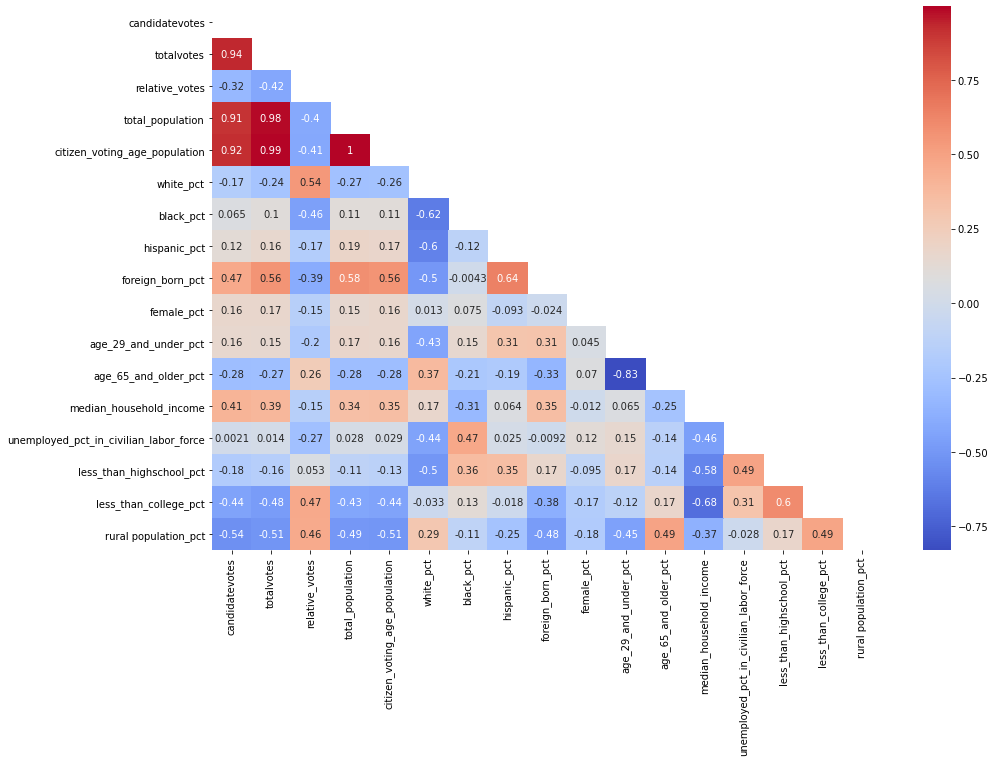

In [22]:
# Do the same, but now break it down by year 2016
republican_2016_df = cleaned_demovotes_df.loc[(cleaned_demovotes_df['party'] == 'republican') & (cleaned_demovotes_df['year'] == 2016)]

# Filter by numerical(float/int) columns 
numeric_columns_2016 = republican_2016_df[['candidatevotes','totalvotes','relative_votes','total_population','citizen_voting_age_population','white_pct','black_pct','hispanic_pct','foreign_born_pct','female_pct',
                                      'age_29_and_under_pct','age_65_and_older_pct','median_household_income','unemployed_pct_in_civilian_labor_force','less_than_highschool_pct','less_than_college_pct','rural population_pct']]

# Check correlation using a heatmap
plt.figure(figsize=(15,10))
matrix = np.triu(numeric_columns_2016.corr())
sns.heatmap(numeric_columns_2016.corr(), annot=True, mask=matrix, cmap='coolwarm')
plt.show()

In [23]:
# Let's only look at the correlations with relative_votes
republican_2016_corr = republican_2016_df.corr()
republican_2016_corr['relative_votes'].sort_values()

black_pct                                -0.456118
totalvotes                               -0.416798
citizen_voting_age_population            -0.409861
total_population                         -0.402487
foreign_born_pct                         -0.387046
candidatevotes                           -0.316118
unemployed_pct_in_civilian_labor_force   -0.268823
age_29_and_under_pct                     -0.198024
hispanic_pct                             -0.171551
female_pct                               -0.146636
median_household_income                  -0.146382
FIPS                                      0.006955
less_than_highschool_pct                  0.053279
age_65_and_older_pct                      0.258127
rural population_pct                      0.458994
less_than_college_pct                     0.466943
white_pct                                 0.543046
relative_votes                            1.000000
year                                           NaN
Name: relative_votes, dtype: fl

In [24]:
#Lets check for statistical significance for these correlations

for col in numeric_columns_2016:
    corr, pvalue = stats.pearsonr(numeric_columns_2016[col],numeric_columns_2016['relative_votes'])
    print(f"The p-value between relative_votes and {[col]} is {pvalue}")

The p-value between relative_votes and ['candidatevotes'] is 4.2552585032135064e-23
The p-value between relative_votes and ['totalvotes'] is 1.6513030321874335e-40
The p-value between relative_votes and ['relative_votes'] is 0.0
The p-value between relative_votes and ['total_population'] is 1.2060484180402151e-37
The p-value between relative_votes and ['citizen_voting_age_population'] is 4.199383177218796e-39
The p-value between relative_votes and ['white_pct'] is 1.102205084990588e-72
The p-value between relative_votes and ['black_pct'] is 3.9989785529626576e-49
The p-value between relative_votes and ['hispanic_pct'] is 1.3483135677341702e-07
The p-value between relative_votes and ['foreign_born_pct'] is 1.042246524189873e-34
The p-value between relative_votes and ['female_pct'] is 6.881175596815296e-06
The p-value between relative_votes and ['age_29_and_under_pct'] is 1.0536110748312086e-09
The p-value between relative_votes and ['age_65_and_older_pct'] is 1.1465069196048453e-15
The 

Moderate correlation with `relative_votes`:

* **`white_pct`**                                 0.543046

Weak correlation with `relative_votes`: 

* **`black_pct`**                                -0.456118
* **`totalvotes`**                               -0.416798
* **`citizen_voting_age_population`**            -0.409861
* **`total_population`**                         -0.402487
* **`less_than_college_pct`**                     0.466943
* **`rural population_pct`**                      0.458994
* **`white_pct`**                                 0.413772
* **`foreign_born_pct`**                         -0.387046
* **`candidatevotes`**                           -0.316118

No correlation with `relative_votes`: 

* **`unemployed_pct_in_civilian_labor_force`**   -0.268823
* **`foreign_born_pct`**                         -0.243467
* **`candidatevotes`**                           -0.220805
* **`female_pct`**                               -0.146636
* **`age_29_and_under_pct`**                     -0.198024
* **`median_household_income`**                  -0.146382
* **`hispanic_pct`**                             -0.171551
* **`FIPS`**                                      0.006955
* **`less_than_highschool_pct`**                  0.053279
* **`age_65_and_older_pct`**                      0.258127

Although a similar pattern was observed in the 2016 elections and the 2012 elections, there were a few key differences. Correlation between `relative_votes` and every data column was seen to be statistically significant at p-value < 0.05, except for `less_than_highschool_pct` with a p-value of 0.103.

More interesting however, is that the correlation coefficient of every columns with weak correlation actually increased when compared to the 2012 elections. `White_pct` also jumped from a weak correlation in the 2012 elections, to a moderate correlation in the 2016 elections.

## Analyzing Poll Data
The sample size for the poll was 2,133 for the 2016 US election. The sample was taken from eligible voters in the states of Florida and Pennsylvania.

* Out of 1,042 respondents in Florida, approximately 46.84% would vote for the Democrats, and 45.22% for the Republicans
* Out of 1,091 respondents in Pennsylvania, approximately 48.94% would be voting for the Democrats, and 41.2% for the Republicans

Let's run a hypothesis test to see whether voters' location is independent of their voting preference.

In order to answer this question, let's analyze the data we have from the poll.

There was a poll with a sample size of 2133 persons. This sample was taken from the states of Florida and Pennsylvania.

* Florida - Total of 1042 respondents 
    * 46.84% voted for the `Democrats`
    * 45.22% voted for the `Republicans`
    * 7.94% voted for `Other`

* Pennsylvania - Total of 1091 respondents
    * 48.94% voted for `Democrats`
    * 41.2% voted for `Republicans`
    * 9.86% voted for `Other`
    
`Other` was determined by subtracting the percentage of democrat and republican voters from 100.
*  For example: 100 - (46.84 + 45.22) = 7.94%

As we are dealing with frequencies and categorical data, it seems that a chi-squared test for independence will be the most appropiate hypothesis test. Let's double check that the assumptions of the Chi-Squared test are true.

#### Assumptions of the Chi-Squared Test

- The data in the cells should be frequencies.
- The levels (or categories) of the variables are mutually exclusive. That is, a particular subject fits into one and only one level of each of the variables.
- Each subject may contribute data to one and only one cell.
- The study groups must be independent.

As the assumptions are satisfied, I will go ahead with this hypothesis test.

For this Chi-Squared test, our hypotheses will be:

$H_0$: Voter's location does not affect their voting preference. (They are independent.)

$H_1$: Voter's location has an effect on voting preference. (They are not independent.)

Now that we have structured the data and determined what hypothesis test to use, let's create a contingency table using the poll data. When inputting the data into the new contingency table, I have converted the percentages into integers. 

* For example: To determine total number of democrat voters in Florida, I have multiplied total respondents (1042) by the percentage of democrat voters (0.4684) which gives 488 persons.

In [25]:
# Lets create a dataframe using the poll data
data = {'Democrats': [488,534], 'Republicans': [471,450], 'Other': [83,107]}
poll_df = pd.DataFrame(data, index=['Florida', 'Pennsylvania'])
poll_df

,Democrats,Republicans,Other
Florida,488,471,83
Pennsylvania,534,450,107


In [26]:
# Calculate the chi-squared statistic and p-value.
stats.chi2_contingency(poll_df)

(4.4575641579119925,
 0.10765947105623529,
 2,
 array([[499.26113455, 449.92123769,  92.81762775],
        [522.73886545, 471.07876231,  97.18237225]]))

Using the output from the chi-squared test, we can compare the observed values of the contingency table against the array of expected values. For example in the observed poll data, 488 people voted for democrats in Florida. In the output of the chi-squared test, it was calculated that the expected number of votes towards democrats in Florida should be approximately 499.

According to the expected values, the chi-squared test believes that:
* Florida: Should have recorded approximately 11 more democrat votes, and approximately 21 less republican votes.
* Pennsylvania: Should have expected approximately 12 less democrat votes, and 21 more republican votes.

However, with a p-value of 0.107, we fail to reject the null hypothesis that a voter's location does not affect their voting preference. Therefore, we can assume that the null hypothesis is true. In this case, it means that the voter's location is independent of their voting preference.



## Fit Linear and Logistic Regression Models

Let's optimize linear regression and logistic regression models that predict 2016 relative vote share of the Republican party within a county using the county-level demographic data.

## Linear Regression Model
There are four assumptions associated with a linear regression model:

1. **Linearity**: The relationship between the predictor and target variables to be linear.
2. **Independence/No Multicollinearity**: The predictor variables are independent of each other.
3. **Residuals** are normally distributed.
4. **Homoscedasticity**: The variance of residual is the same for any value of X.

As we are interested in predicting 2016 relative vote share of the republican party within a county, I will filter our cleaned_demovotes_df by the year 2016 and party by republican. The independent variables in this case will be every numerical column in the dataframe:

* candidatevotes
* totalvotes
* relative_votes
* total_population
* citizen_voting_age_population
* white_pct                             
* black_pct                              
* hispanic_pct                            
* foreign_born_pct                        
* female_pct                              
* age_29_and_under_pct                    
* age_65_and_older_pct                 
* median_household_income                 
* unemployed_pct_in_civilian_labor_force  
* less_than_highschool_pct                
* less_than_college_pct                   
* rural population_pct  

The dependent variable will be relative_votes in this case as we are looking at the relationship between relative vote share of the republican party.

In [27]:
# Filter df to year 2016 and republican party
# I have already created this df earlier
republican_2016_df.head()

,year,state,county,FIPS,candidate,party,candidatevotes,totalvotes,relative_votes,total_population,...,hispanic_pct,foreign_born_pct,female_pct,age_29_and_under_pct,age_65_and_older_pct,median_household_income,unemployed_pct_in_civilian_labor_force,less_than_highschool_pct,less_than_college_pct,rural population_pct
1867,2016,Alabama,Chambers,1017,Donald Trump,republican,7843.0,13900,57.554854,34018.0,...,0.435064,0.990652,52.087130,35.872185,18.387324,36027.0,7.489945,19.736732,87.515721,49.148034
1869,2016,Alabama,Cherokee,1019,Donald Trump,republican,8953.0,10733,85.266667,25897.0,...,3.823285,0.725953,50.252925,32.710353,20.322817,38925.0,5.855731,18.717235,86.038301,85.736273
1871,2016,Alabama,Clarke,1025,Donald Trump,republican,7140.0,13031,55.396074,24847.0,...,0.173059,0.466857,52.758884,36.604017,18.062543,32735.0,17.083333,18.957819,87.862766,75.980335
1873,2016,Alabama,Clay,1027,Donald Trump,republican,5245.0,6624,80.916384,13483.0,...,3.107617,1.891270,51.553808,34.843877,19.402210,38815.0,6.591530,25.386407,88.937116,100.000000
1875,2016,Alabama,Cleburne,1029,Donald Trump,republican,5764.0,6593,89.392060,14991.0,...,2.328064,1.747715,50.483624,36.141685,18.164232,36316.0,7.173601,25.815165,88.471927,100.000000


In [28]:
# Create target and predictor variables

# Predictor variable
# I will also drop Year, FIPS, and candidate as they are categorical variables, and not continuous variables.
# These categorical variables were tested for correlation within the heatmap, and were concluded to have no correlation with relative votes
X = republican_2016_df.drop(columns = ['relative_votes','year','FIPS'])

# Target variable
y = republican_2016_df['relative_votes']

# Double check shape of the data
print(f'Original data set had {republican_2016_df.shape[0]} rows and {republican_2016_df.shape[1]} columns.')
print(f'X has {X.shape[0]} rows and {X.shape[1]} columns.')
print(f'y has {y.shape[0]} rows and 1 column.')

Original data set had 933 rows and 23 columns.
X has 933 rows and 20 columns.
y has 933 rows and 1 column.


## 3.1 Testing Linearity Assumption

According to this assumption, the relationship between the predictor and target variables should be linear. I will test this by creating scatterplots comparing `relative_votes` to each column.

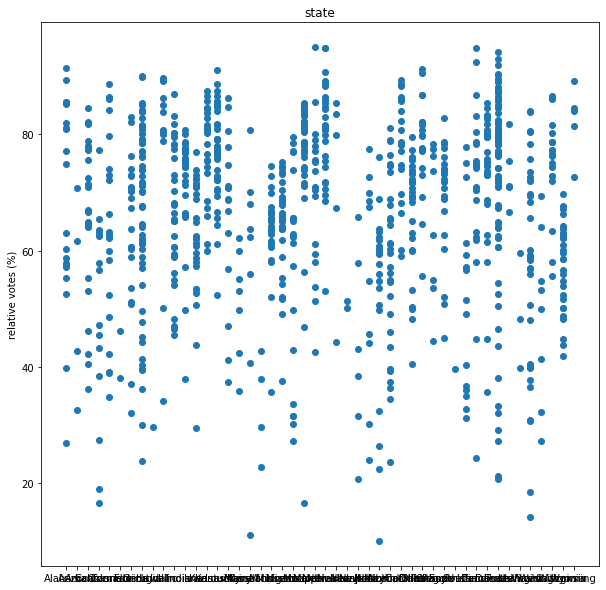

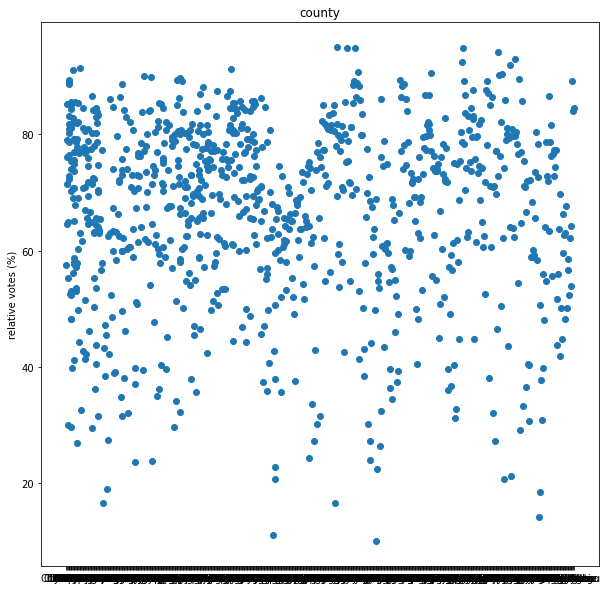

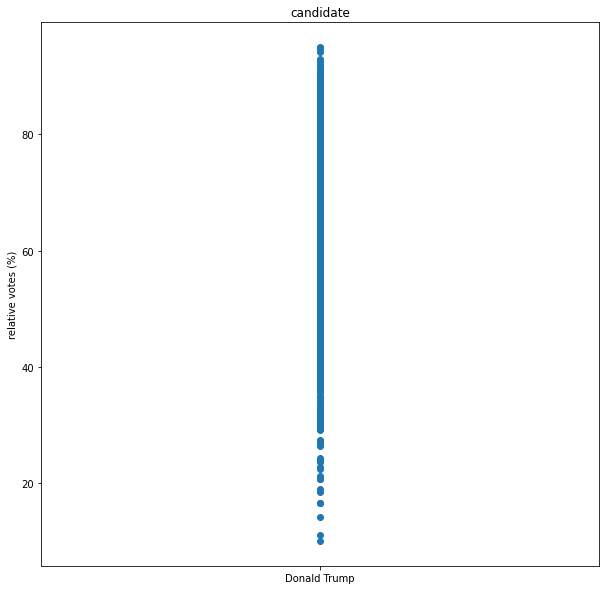

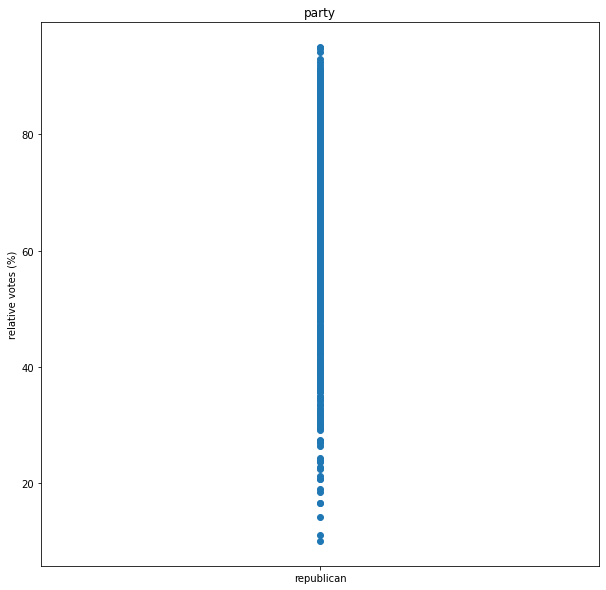

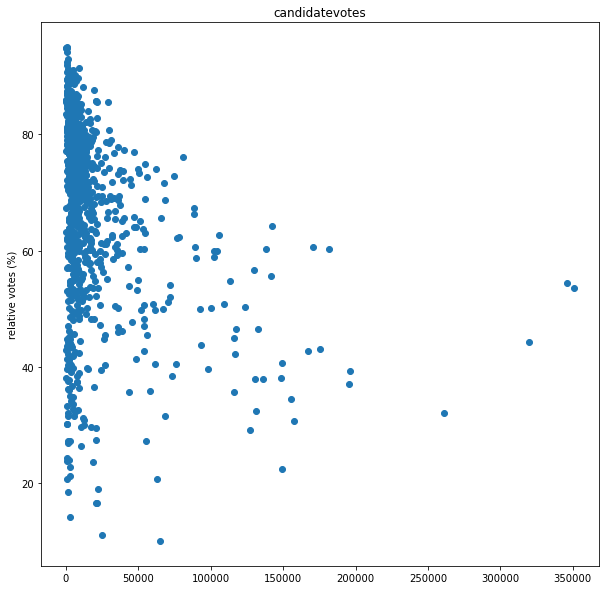

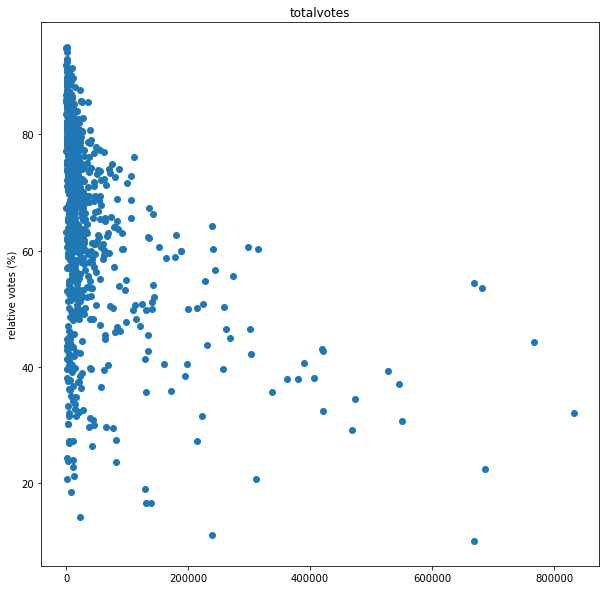

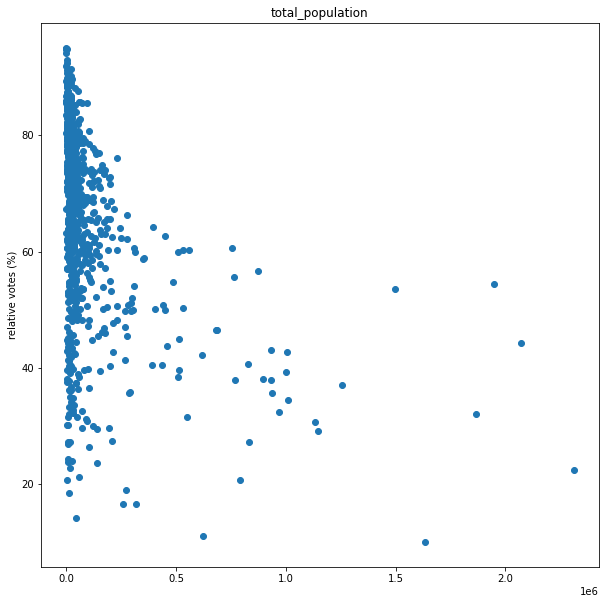

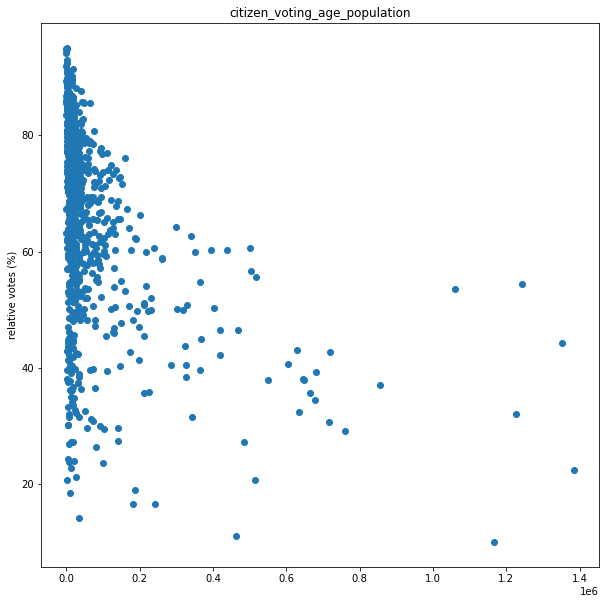

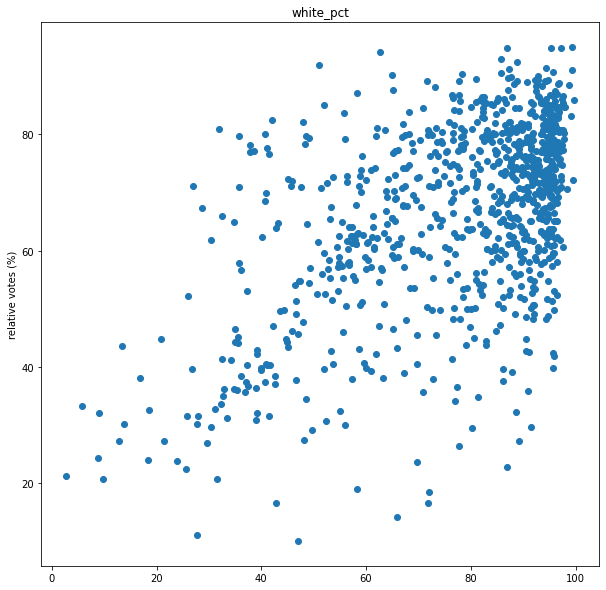

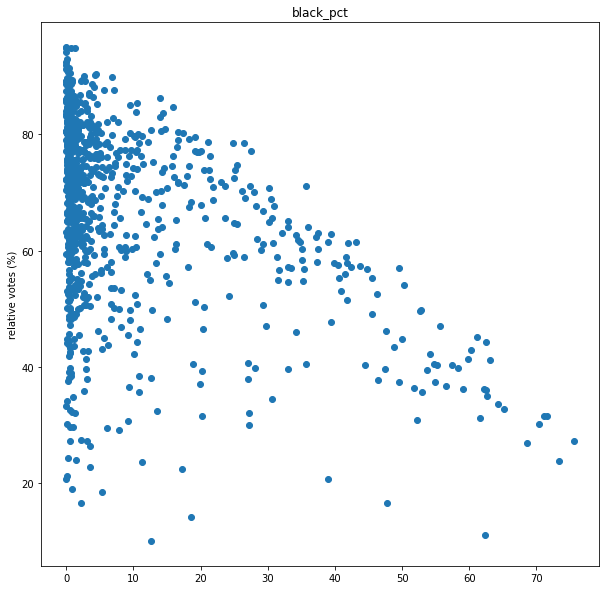

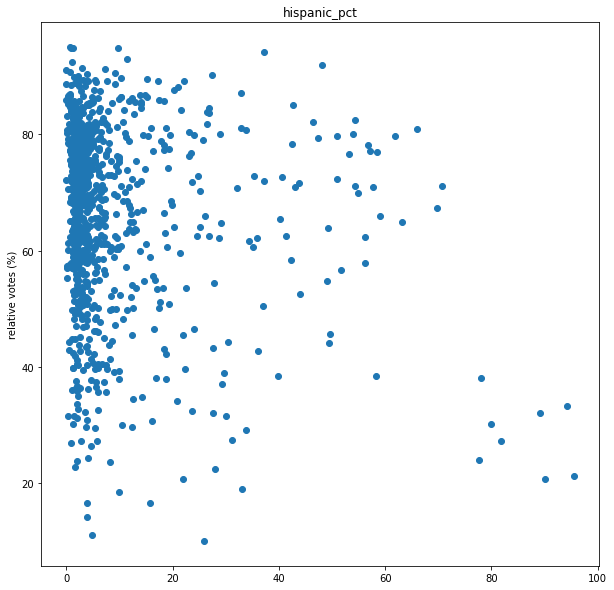

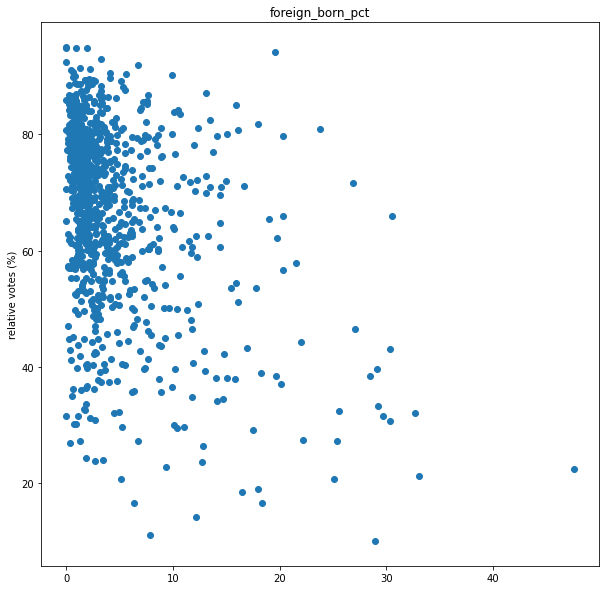

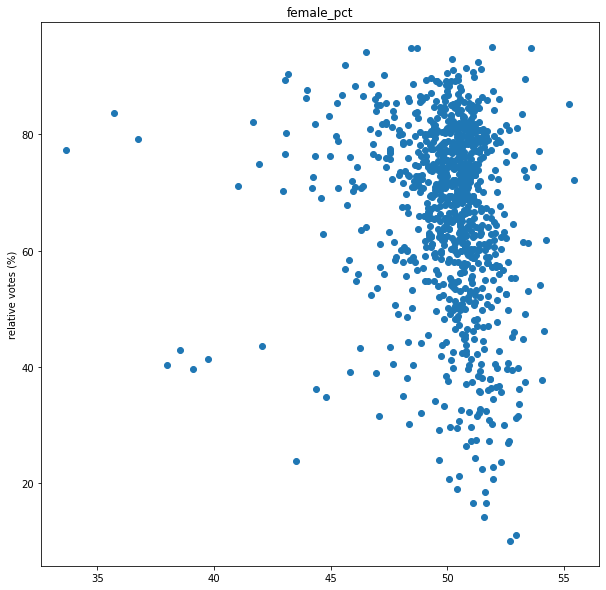

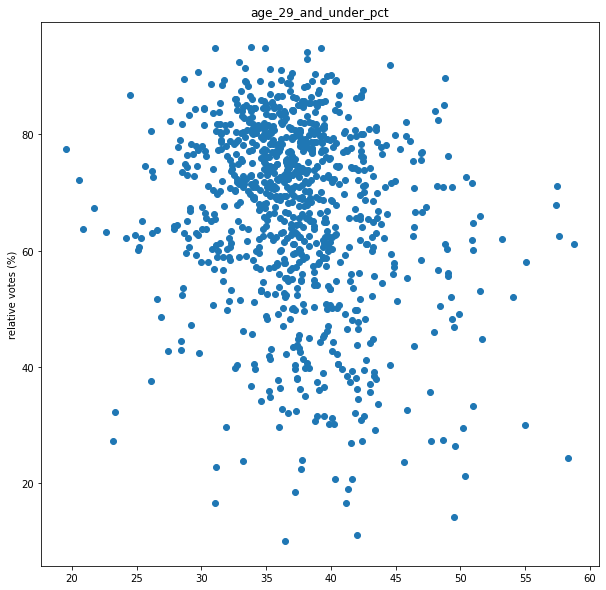

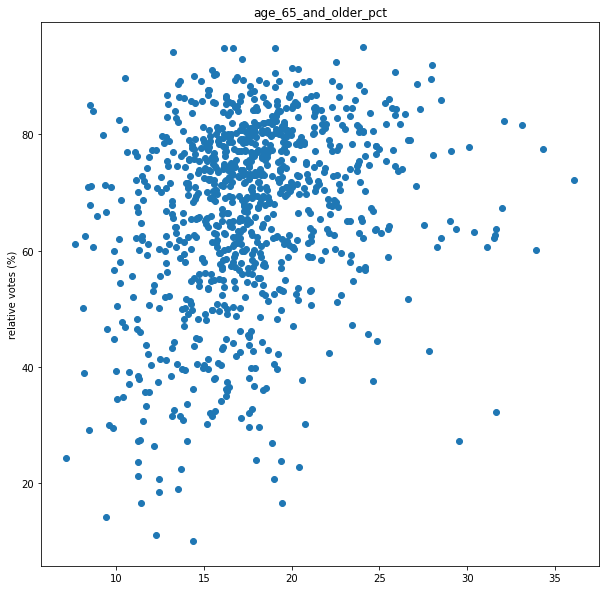

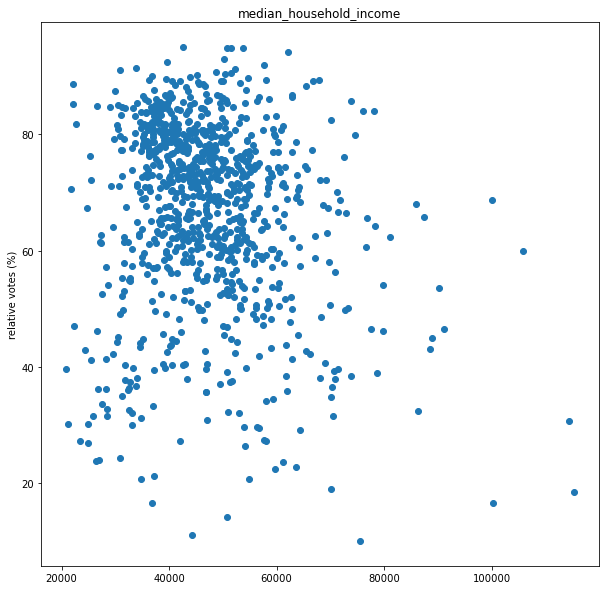

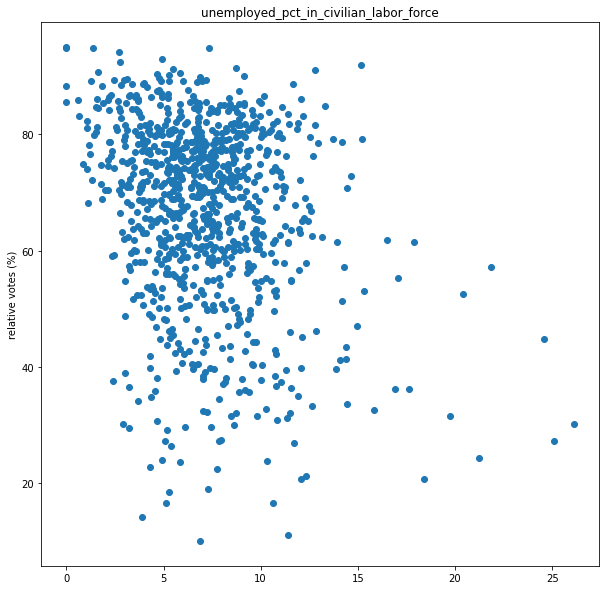

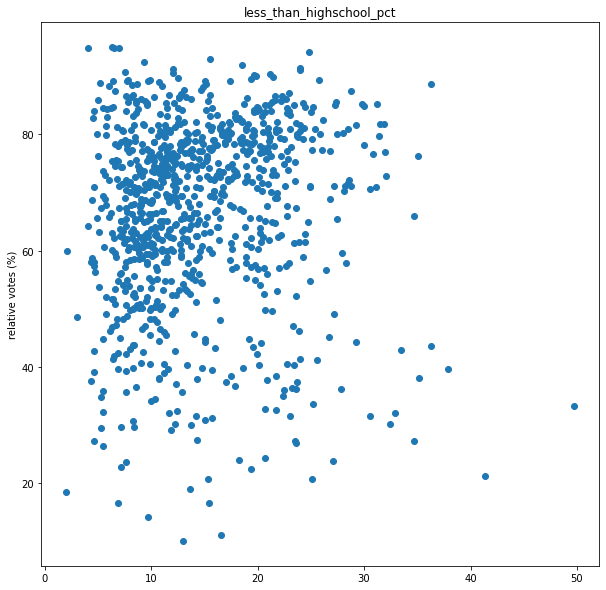

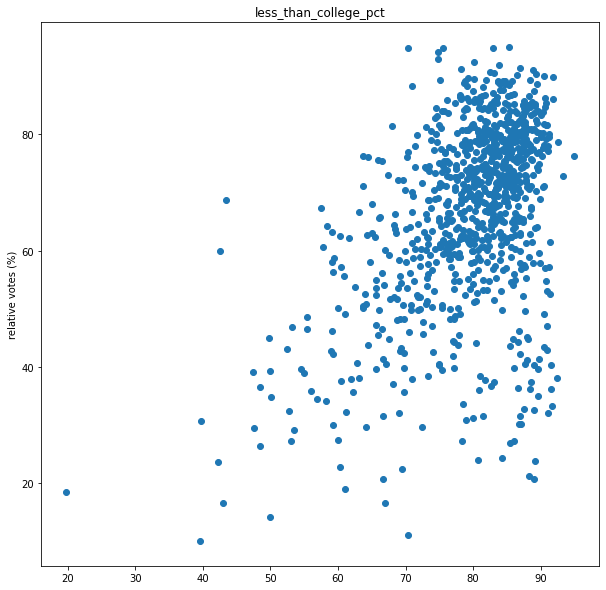

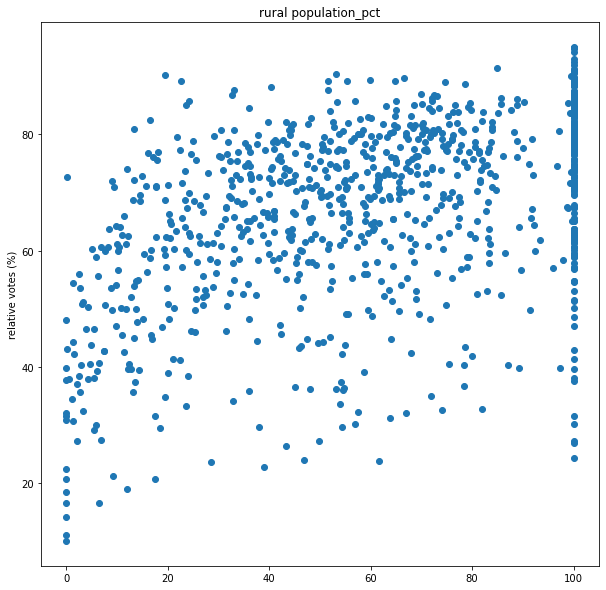

In [29]:
# Loop over columns to compare the relationship between relative votes and predictor variables
for col in X.columns:
    plt.figure(figsize = (10,10))
    plt.scatter(X[col],y)
    plt.title(col)
    plt.ylabel('relative votes (%)')
    
plt.show()

After visualizing the data, it seems that the only variables with a clear linear relationship between our target variable `relative_votes` are:
* `less_than_college_pct`
* `black_pct`
* `white_pct`

However, this does not mean that the other variables violate the linearity assumption. Let's go ahead and test the other assumptions.

## 3.2 Independence/Multicollinearity Assumption

According to this assumption, the predictor variables should be independent of each other. In other words, there should be no collinearity between predictor variables. 

To test this, I have created a heatmap displaying the correlation between the predictor variables.

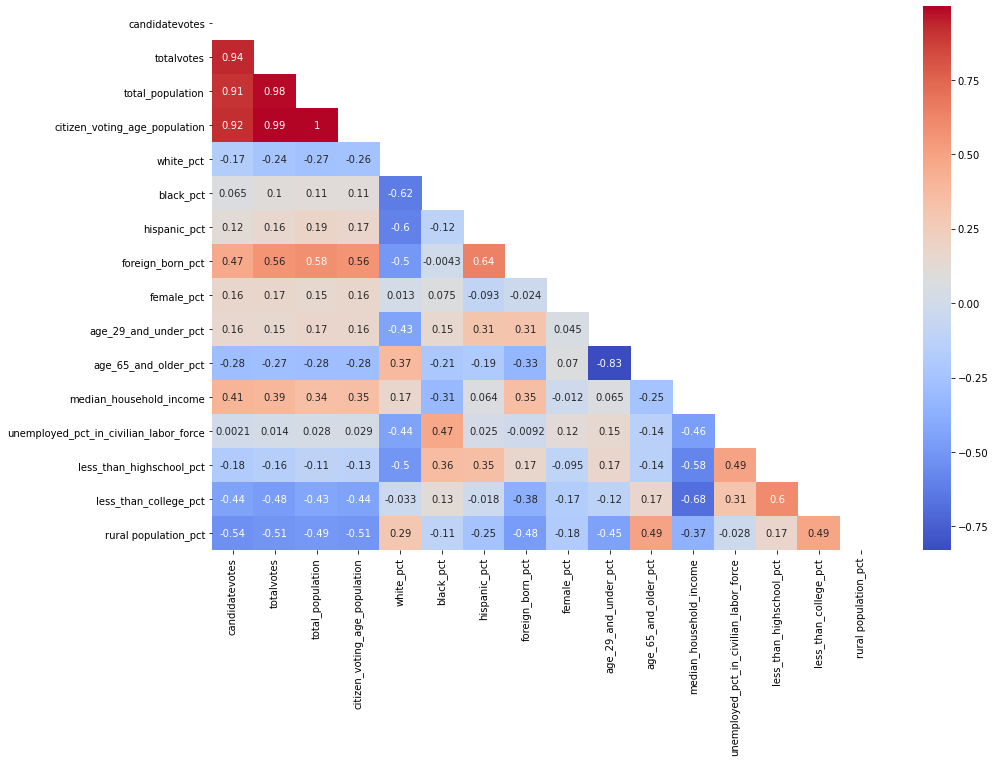

In [30]:
# Correlation of the variables in a heatmap
# year and FIPS are categorical data, so I will exclude them from this heatmap.
# Both year and FIPS had no correlation between any variables
plt.figure(figsize=(15,10))
matrix = np.triu(X.corr())
sns.heatmap(X.corr(),annot=True, mask=matrix, cmap='coolwarm')
plt.show()

As mentioned previously, any correlation coefficients above 0.70 are deemed to have a strong correlation relationship.

There seems to be a few instances of high positive collinearity:

* **`totalvotes`** with **`candidatevotes`**
* **`total_population`** with **`candidatevotes`**
* **`citizen_voting_age_population`** with **`candidatevotes`**
* **`total_population`** with **`totalvotes`**
* **`citizen_voting_age_population`** with **`totalvotes`**
* **`citizen_voting_age_population`** with **`total_population`**

There is one relationship between **`ag_65_and_older_pct`** with **`age_29_and_under_pct`** which displays strong negative collinearity.

This high collinearity makes sense however, as `totalvotes` will obviously be strongly correlated with for example, the citizen's voting age population, as well as any metric regarding count of votes. 



Now, let's check the `Variance Inflation Factor` (VIF) to detect multicollinearity.

Typically, VIF values should be 1 when there is no multicollinearity. Any VIF value greater than 5 will indicate high collinearity between the independent variables.

In [31]:
# Calculate VIF for predictor variables
# Must drop categorical data to do so.
X = republican_2016_df.drop(columns = ['year','FIPS','state','county','candidate','party'])

from statsmodels.stats.outliers_influence import variance_inflation_factor

pd.Series([variance_inflation_factor(X.values, i) 
               for i in range(X.shape[1])], 
              index=X.columns)

candidatevotes                             13.294401
totalvotes                                 87.691172
relative_votes                             53.399763
total_population                          215.914177
citizen_voting_age_population             328.925007
white_pct                                 124.624725
black_pct                                   5.865078
hispanic_pct                                7.015033
foreign_born_pct                            7.046401
female_pct                                538.341144
age_29_and_under_pct                      162.055497
age_65_and_older_pct                       72.023118
median_household_income                    43.053987
unemployed_pct_in_civilian_labor_force     11.350275
less_than_highschool_pct                   22.194411
less_than_college_pct                     224.353692
rural population_pct                       11.359240
dtype: float64

Extremely high VIF values are found in `total_population`, `citizen_voting_age_population`, `female_pct`, `age_29_and_under_pct`, and `less_than_college_pct`. Let's try to run the VIF calculation again by removing the variables with high VIF values one by one. I will remove the variables starting with the highest VIF.

In [32]:
# Run VIF calculation again but this time remove female_pct
X = republican_2016_df.drop(columns = ['year','FIPS','state','county','candidate','party','female_pct'])

from statsmodels.stats.outliers_influence import variance_inflation_factor

pd.Series([variance_inflation_factor(X.values, i) 
               for i in range(X.shape[1])], 
              index=X.columns)

candidatevotes                             13.277067
totalvotes                                 87.550656
relative_votes                             52.502681
total_population                          215.909998
citizen_voting_age_population             328.903803
white_pct                                 109.433022
black_pct                                   5.417039
hispanic_pct                                6.917918
foreign_born_pct                            7.020282
age_29_and_under_pct                       78.892384
age_65_and_older_pct                       40.503765
median_household_income                    38.003960
unemployed_pct_in_civilian_labor_force     10.924010
less_than_highschool_pct                   21.937988
less_than_college_pct                     218.691940
rural population_pct                       11.246320
dtype: float64

By removing `female_pct`, I notice that the VIF in a few variables have decreased. For example, VIF of `age_29_and_under_pct` decreased from 162 to approximately 79. However, these values are still extremely high. Let's run the VIF calculation again, but this time removing `citizen_voting_age_population`

In [33]:
# Run VIF calculation again but this time remove female_pct and citizen_voting_age_population
X = republican_2016_df.drop(columns = ['year','FIPS','state','county','candidate','party','female_pct', 'citizen_voting_age_population'])

from statsmodels.stats.outliers_influence import variance_inflation_factor

pd.Series([variance_inflation_factor(X.values, i) 
               for i in range(X.shape[1])], 
              index=X.columns)

candidatevotes                             13.260274
totalvotes                                 63.137451
relative_votes                             52.333746
total_population                           43.363573
white_pct                                 109.207009
black_pct                                   5.413449
hispanic_pct                                6.901956
foreign_born_pct                            6.698220
age_29_and_under_pct                       78.698227
age_65_and_older_pct                       40.396535
median_household_income                    37.970944
unemployed_pct_in_civilian_labor_force     10.921450
less_than_highschool_pct                   21.925411
less_than_college_pct                     218.659422
rural population_pct                       10.961838
dtype: float64

After removing `citizen_voting_age_population`, a decrease in VIF values were observed in some variables such as `total_population`. Let's try running the VIF calculation again after removing `less_than_college_pct`.

In [34]:
# Run VIF calculation again but this time remove female_pct, citizen_voting_age_population, and less_than_college_pct
X = republican_2016_df.drop(columns = ['year','FIPS','state','county','candidate','party','female_pct', 'citizen_voting_age_population','less_than_college_pct'])

from statsmodels.stats.outliers_influence import variance_inflation_factor

pd.Series([variance_inflation_factor(X.values, i) 
               for i in range(X.shape[1])], 
              index=X.columns)

candidatevotes                             13.260127
totalvotes                                 61.580572
relative_votes                             46.452206
total_population                           41.728817
white_pct                                 101.537501
black_pct                                   4.969366
hispanic_pct                                6.552086
foreign_born_pct                            6.346311
age_29_and_under_pct                       62.497393
age_65_and_older_pct                       34.511373
median_household_income                    37.939356
unemployed_pct_in_civilian_labor_force     10.315517
less_than_highschool_pct                   18.178890
rural population_pct                       10.779233
dtype: float64

I will rerun the VIF calculation, but this time removing `white_pct`

In [35]:
# Run VIF calculation again but this time remove female_pct, citizen_voting_age_population, less_than_college_pct, white_pct
X = republican_2016_df.drop(columns = ['year','FIPS','state','county','candidate','party','female_pct', 'citizen_voting_age_population','less_than_college_pct','white_pct'])

from statsmodels.stats.outliers_influence import variance_inflation_factor

pd.Series([variance_inflation_factor(X.values, i) 
               for i in range(X.shape[1])], 
              index=X.columns)

candidatevotes                            13.243601
totalvotes                                61.489804
relative_votes                            41.796070
total_population                          41.714108
black_pct                                  2.781583
hispanic_pct                               3.342579
foreign_born_pct                           6.223392
age_29_and_under_pct                      49.681561
age_65_and_older_pct                      20.442563
median_household_income                   32.290776
unemployed_pct_in_civilian_labor_force    10.252808
less_than_highschool_pct                  17.781703
rural population_pct                      10.697989
dtype: float64

Lastly, let's run the VIF calculation again but remove `total_population`.

In [36]:
# Run VIF calculation again but this time remove female_pct, citizen_voting_age_population, less_than_college_pct, white_pct, total_population
X = republican_2016_df.drop(columns = ['year','FIPS','state','county','candidate','party','female_pct', 'citizen_voting_age_population','less_than_college_pct','white_pct','total_population'])

from statsmodels.stats.outliers_influence import variance_inflation_factor

pd.Series([variance_inflation_factor(X.values, i) 
               for i in range(X.shape[1])], 
              index=X.columns)

candidatevotes                            12.976858
totalvotes                                13.628380
relative_votes                            41.270767
black_pct                                  2.781080
hispanic_pct                               3.338634
foreign_born_pct                           6.087473
age_29_and_under_pct                      49.113458
age_65_and_older_pct                      20.335072
median_household_income                   30.109932
unemployed_pct_in_civilian_labor_force    10.248092
less_than_highschool_pct                  17.738816
rural population_pct                      10.638592
dtype: float64

After removing `white_pct`, `citizen_voting_age_population`, `female_pct` and `age_29_and_under_pct`, we saw a large decrease in VIF values for each independent variable. After removing `total_population`, it did not seem to have a strong effect on the VIF value, so removing it is not necessary.

However, even after removing multiple independent variables, the only variables under the threshold of 5, which indicates weak multicollinearity were 
* black_pct = 2.78
* hispanic_pct = 3.34

Lastly, I will just view the correlation between the predictor (X) and target variables (y)

In [37]:
# Let's only look at the correlations with relative_votes (y variable)
republican_2016_corr = republican_2016_df.corr()
republican_2016_corr['relative_votes'].sort_values()

black_pct                                -0.456118
totalvotes                               -0.416798
citizen_voting_age_population            -0.409861
total_population                         -0.402487
foreign_born_pct                         -0.387046
candidatevotes                           -0.316118
unemployed_pct_in_civilian_labor_force   -0.268823
age_29_and_under_pct                     -0.198024
hispanic_pct                             -0.171551
female_pct                               -0.146636
median_household_income                  -0.146382
FIPS                                      0.006955
less_than_highschool_pct                  0.053279
age_65_and_older_pct                      0.258127
rural population_pct                      0.458994
less_than_college_pct                     0.466943
white_pct                                 0.543046
relative_votes                            1.000000
year                                           NaN
Name: relative_votes, dtype: fl

The variables that showed the highest correlation with the target variable `relative_votes` was `white_pct`. The rest of the columns had a correlation less than 0.5, indicating either a weak correlation or no correlation at all.

I will check the assumption that residuals are normally distributed as well as homoscedasticity after modelling the data.
As I will build multiple models to optimize the linear regression model, I will include every variable that I dropped in my VIF calculations to begin with. 

### Model 1.0

In [38]:
# Add constant
X = republican_2016_df.drop(columns = ['relative_votes','state','county','candidate','party','FIPS'])
X_withconstant = sm.add_constant(X, has_constant='add')
X_withconstant.head()

,const,year,candidatevotes,totalvotes,total_population,citizen_voting_age_population,white_pct,black_pct,hispanic_pct,foreign_born_pct,female_pct,age_29_and_under_pct,age_65_and_older_pct,median_household_income,unemployed_pct_in_civilian_labor_force,less_than_highschool_pct,less_than_college_pct,rural population_pct
1867,1.0,2016,7843.0,13900,34018.0,26480.0,56.743489,40.478570,0.435064,0.990652,52.087130,35.872185,18.387324,36027.0,7.489945,19.736732,87.515721,49.148034
1869,1.0,2016,8953.0,10733,25897.0,20505.0,91.871645,4.606711,3.823285,0.725953,50.252925,32.710353,20.322817,38925.0,5.855731,18.717235,86.038301,85.736273
1871,1.0,2016,7140.0,13031,24847.0,19195.0,53.177446,45.494426,0.173059,0.466857,52.758884,36.604017,18.062543,32735.0,17.083333,18.957819,87.862766,75.980335
1873,1.0,2016,5245.0,6624,13483.0,10360.0,80.264036,14.744493,3.107617,1.891270,51.553808,34.843877,19.402210,38815.0,6.591530,25.386407,88.937116,100.000000
1875,1.0,2016,5764.0,6593,14991.0,11295.0,92.795677,2.361417,2.328064,1.747715,50.483624,36.141685,18.164232,36316.0,7.173601,25.815165,88.471927,100.000000


In [39]:
# 1. Instantiate Model
line_regression = sm.OLS(y, X_withconstant)

# 2. Fit Model (this returns a seperate object with the parameters)
line_regression_results = line_regression.fit()

# Looking at the summary
line_regression_results.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         relative_votes   R-squared:                       0.660
Model:                            OLS   Adj. R-squared:                  0.654
Method:                 Least Squares   F-statistic:                     111.1
Date:                Mon, 03 May 2021   Prob (F-statistic):          1.40e-201
Time:                        17:53:06   Log-Likelihood:                -3399.4
No. Observations:                 933   AIC:                             6833.
Df Residuals:                     916   BIC:                             6915.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                  -1.714e-05   3.22e-06     -5.316      0.000   -2.35e-05   -1.08e-05
year                                      -0.0345      0.006     -5.316      0.000      -0.047      -0.022
candidatevotes                             0.0002   2.81e-05      7.063      0.000       0.000       0.000
totalvotes                              -7.11e-05   3.02e-05     -2.351      0.019      -0.000   -1.18e-05
total_population                        3.397e-05   1.97e-05      1.726      0.085   -4.65e-06    7.26e-05
citizen_voting_age_population          -5.244e-05    3.6e-05     -1.458      0.145      -0.000    1.81e-05
white_pct                                  0.3842      0.044      8.716      0.000       0.298       0.471
black_pct                                 -0.1326      0.046     -2.899      0.004      -0.222      -0.043
hispanic_pct                               0.0591      0.051      1.159      0.247      -0.041       0.159
foreign_born_pct                          -0.0998      0.119     -0.836      0.404      -0.334       0.135
female_pct                                -0.1476      0.161     -0.918      0.359      -0.463       0.168
age_29_and_under_pct                       0.7632      0.125      6.121      0.000       0.519       1.008
age_65_and_older_pct                       0.6177      0.162      3.801      0.000       0.299       0.937
median_household_income                    0.0002   4.76e-05      3.876      0.000     9.1e-05       0.000
unemployed_pct_in_civilian_labor_force    -0.8424      0.129     -6.509      0.000      -1.096      -0.588
less_than_highschool_pct                   0.4557      0.090      5.081      0.000       0.280       0.632
less_than_college_pct                      0.7686      0.061     12.587      0.000       0.649       0.888
rural population_pct                       0.0758      0.015      4.971      0.000       0.046       0.106
==============================================================================
Omnibus:                       35.015   Durbin-Watson:                   1.438
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               40.086
Skew:                          -0.432   Prob(JB):                     1.97e-09
Kurtosis:                       3.533   Cond. No.                     1.12e+20
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 6.41e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

P values > 0.05 were observed in `foreign_born_pct`, `female_pct`, `hispanic_pct`, `total_population`, and `citizen_voting_age_population`. This means that these variables are not statistically significant for our model, and therefore I will remove these columns to optimize the model.

#### Model 1.1

In [40]:
#Optimize model by removing 'foreign_born_pct','female_pct','hispanic_pct','citizen_voting_age_population','total_population'
# Add constant
X1 = republican_2016_df.drop(columns = ['relative_votes','state','county','candidate','party','FIPS','foreign_born_pct','female_pct','hispanic_pct','citizen_voting_age_population','total_population'])
X1_withconstant = sm.add_constant(X1, has_constant='add')

# 1. Instantiate Model
line_regression2 = sm.OLS(y, X1_withconstant)

# 2. Fit Model (this returns a seperate object with the parameters)
line_regression2_results = line_regression2.fit()

# Looking at the summary
line_regression2_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         relative_votes   R-squared:                       0.658
Model:                            OLS   Adj. R-squared:                  0.654
Method:                 Least Squares   F-statistic:                     161.2
Date:                Mon, 03 May 2021   Prob (F-statistic):          6.60e-206
Time:                        17:53:06   Log-Likelihood:                -3401.9
No. Observations:                 933   AIC:                             6828.
Df Residuals:                     921   BIC:                             6886.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                  -1.827e-05   2.72e-06     -6.703      0.000   -2.36e-05   -1.29e-05
year                                      -0.0368      0.005     -6.703      0.000      -0.048      -0.026
candidatevotes                             0.0002   2.68e-05      7.340      0.000       0.000       0.000
totalvotes                             -7.567e-05   1.07e-05     -7.047      0.000   -9.67e-05   -5.46e-05
white_pct                                  0.3439      0.027     12.934      0.000       0.292       0.396
black_pct                                 -0.1714      0.030     -5.652      0.000      -0.231      -0.112
age_29_and_under_pct                       0.7413      0.121      6.119      0.000       0.504       0.979
age_65_and_older_pct                       0.5868      0.155      3.791      0.000       0.283       0.891
median_household_income                    0.0002   4.51e-05      4.055      0.000    9.43e-05       0.000
unemployed_pct_in_civilian_labor_force    -0.9020      0.123     -7.311      0.000      -1.144      -0.660
less_than_highschool_pct                   0.4558      0.078      5.845      0.000       0.303       0.609
less_than_college_pct                      0.7974      0.057     13.903      0.000       0.685       0.910
rural population_pct                       0.0802      0.014      5.601      0.000       0.052       0.108
==============================================================================
Omnibus:                       31.139   Durbin-Watson:                   1.436
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               34.420
Skew:                          -0.417   Prob(JB):                     3.36e-08
Kurtosis:                       3.437   Cond. No.                     4.63e+20
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.75e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In model 1.1 the following columns were removed:
* foreign_born_pct 
* female_pct
* hispanic_pct
* total_population
* citizen_voting_age_population

**Model Assessment with R<sup>2<sup/>** <br>
    
| Model   | R<sup>2<sup/>   | 
|-------------|-------|
| Model 1.0 | 0.660 |
| Model 1.1 | 0.658 |

The R-squared value between Model 1 and Model 1.1 were pretty much identical, with values 0.660 and 0.658, respectively.
This value indicates that our model explains approximately 66% of variance in our data. As R-squared indicates how well our model explains the variance, it is a good metric in determining the fit of our model.



#### Model 2.0

Perhaps fitting our model with the highest correlated variables will improve the R-squared value. As `white_pct` was the most correlated variable with `relative_votes`, I will try fitting our model using only this column.

In [41]:
# Let's only look at the correlations with relative_votes (y variable)
republican_2016_corr = republican_2016_df.corr()
republican_2016_corr['relative_votes'].sort_values()

black_pct                                -0.456118
totalvotes                               -0.416798
citizen_voting_age_population            -0.409861
total_population                         -0.402487
foreign_born_pct                         -0.387046
candidatevotes                           -0.316118
unemployed_pct_in_civilian_labor_force   -0.268823
age_29_and_under_pct                     -0.198024
hispanic_pct                             -0.171551
female_pct                               -0.146636
median_household_income                  -0.146382
FIPS                                      0.006955
less_than_highschool_pct                  0.053279
age_65_and_older_pct                      0.258127
rural population_pct                      0.458994
less_than_college_pct                     0.466943
white_pct                                 0.543046
relative_votes                            1.000000
year                                           NaN
Name: relative_votes, dtype: fl

`White_pct` had the highest correlation coefficient with `relative_votes`. This value was however only 0.54, indicating a positive moderate correlation. Each other variable had either a weak correlation, or no correlation at all.

In [42]:
# Linear Regression Summary
linear_regression3 = linear_model.OLS(y, X_withconstant[['const', 'white_pct']]).fit()
linear_regression3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         relative_votes   R-squared:                       0.295
Model:                            OLS   Adj. R-squared:                  0.294
Method:                 Least Squares   F-statistic:                     389.4
Date:                Mon, 03 May 2021   Prob (F-statistic):           1.10e-72
Time:                        17:53:06   Log-Likelihood:                -3739.5
No. Observations:                 933   AIC:                             7483.
Df Residuals:                     931   BIC:                             7493.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         32.9210      1.770     18.602      0.000      29.448      36.394
white_pct      0.4348      0.022     19.733      0.000       0.392       0.478
==============================================================================
Omnibus:                       50.281   Durbin-Watson:                   1.183
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               60.832
Skew:                          -0.529   Prob(JB):                     6.17e-14
Kurtosis:                       3.668   Cond. No.                         326.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

R-squared value for model 2.0 was 0.295. This is not great, and I will try fitting the next highest correlated variable in this model. 
* `less_than_college_pct`                     0.466943

#### Model 2.1

In [43]:
# Instantiate and fit model
linear_regression4 = linear_model.OLS(y, X_withconstant[['const', 'white_pct','less_than_college_pct']]).fit()
# Look at summary
linear_regression4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         relative_votes   R-squared:                       0.530
Model:                            OLS   Adj. R-squared:                  0.529
Method:                 Least Squares   F-statistic:                     524.4
Date:                Mon, 03 May 2021   Prob (F-statistic):          3.34e-153
Time:                        17:53:06   Log-Likelihood:                -3550.3
No. Observations:                 933   AIC:                             7107.
Df Residuals:                     930   BIC:                             7121.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   -35.8626      3.501    -10.242      0.000     -42.734     -28.991
white_pct                 0.4474      0.018     24.846      0.000       0.412       0.483
less_than_college_pct     0.8519      0.039     21.569      0.000       0.774       0.929
==============================================================================
Omnibus:                        1.282   Durbin-Watson:                   1.241
Prob(Omnibus):                  0.527   Jarque-Bera (JB):                1.334
Skew:                           0.088   Prob(JB):                        0.513
Kurtosis:                       2.939   Cond. No.                     1.10e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.1e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

With an R-squared value of 0.530, we see significant improvement in our model. I will try again, but this time adding `black_pct`.

In [44]:
# Instantiate and fit model
linear_regression5 = linear_model.OLS(y, X_withconstant[['const', 'white_pct','less_than_college_pct','black_pct']]).fit()
# Look at summary
linear_regression5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         relative_votes   R-squared:                       0.578
Model:                            OLS   Adj. R-squared:                  0.576
Method:                 Least Squares   F-statistic:                     423.5
Date:                Mon, 03 May 2021   Prob (F-statistic):          2.49e-173
Time:                        17:53:06   Log-Likelihood:                -3500.4
No. Observations:                 933   AIC:                             7009.
Df Residuals:                     929   BIC:                             7028.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   -26.4703      3.445     -7.683      0.000     -33.232     -19.709
white_pct                 0.3080      0.022     14.095      0.000       0.265       0.351
less_than_college_pct     0.9041      0.038     23.913      0.000       0.830       0.978
black_pct                -0.3056      0.030    -10.236      0.000      -0.364      -0.247
==============================================================================
Omnibus:                        7.354   Durbin-Watson:                   1.296
Prob(Omnibus):                  0.025   Jarque-Bera (JB):                7.253
Skew:                          -0.203   Prob(JB):                       0.0266
Kurtosis:                       3.148   Cond. No.                     1.15e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.15e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

We have a small improvement in R-squared value when adding `black_pct`.

In [45]:
# Instantiate and fit model
linear_regression6 = linear_model.OLS(y, X_withconstant[['const', 'white_pct','less_than_college_pct','black_pct','rural population_pct']]).fit()
# Look at summary
linear_regression6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         relative_votes   R-squared:                       0.584
Model:                            OLS   Adj. R-squared:                  0.582
Method:                 Least Squares   F-statistic:                     325.9
Date:                Mon, 03 May 2021   Prob (F-statistic):          4.08e-175
Time:                        17:53:06   Log-Likelihood:                -3493.2
No. Observations:                 933   AIC:                             6996.
Df Residuals:                     928   BIC:                             7021.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   -20.6500      3.745     -5.514      0.000     -28.000     -13.300
white_pct                 0.2818      0.023     12.390      0.000       0.237       0.326
less_than_college_pct     0.8187      0.044     18.735      0.000       0.733       0.904
black_pct                -0.3094      0.030    -10.433      0.000      -0.368      -0.251
rural population_pct      0.0511      0.013      3.817      0.000       0.025       0.077
==============================================================================
Omnibus:                       14.034   Durbin-Watson:                   1.325
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               14.293
Skew:                          -0.283   Prob(JB):                     0.000788
Kurtosis:                       3.217   Cond. No.                     1.44e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.44e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

There was a negligible increase in R-squared after adding `rural population_pct`. I will add `citizen_voting_age_population` next and see if there is a strong increase in R-squared value.

In [46]:
# Instantiate and fit model
linear_regression5 = linear_model.OLS(y, X_withconstant[['const', 'white_pct','less_than_college_pct','black_pct','rural population_pct','citizen_voting_age_population']]).fit()
# Look at summary
linear_regression5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         relative_votes   R-squared:                       0.586
Model:                            OLS   Adj. R-squared:                  0.584
Method:                 Least Squares   F-statistic:                     262.2
Date:                Mon, 03 May 2021   Prob (F-statistic):          1.28e-174
Time:                        17:53:06   Log-Likelihood:                -3491.4
No. Observations:                 933   AIC:                             6995.
Df Residuals:                     927   BIC:                             7024.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                           -17.3105      4.129     -4.192      0.000     -25.414      -9.207
white_pct                         0.2753      0.023     11.984      0.000       0.230       0.320
less_than_college_pct             0.7933      0.046     17.390      0.000       0.704       0.883
black_pct                        -0.3088      0.030    -10.426      0.000      -0.367      -0.251
rural population_pct              0.0430      0.014      3.070      0.002       0.016       0.070
citizen_voting_age_population -5.528e-06    2.9e-06     -1.908      0.057   -1.12e-05    1.57e-07
==============================================================================
Omnibus:                       18.598   Durbin-Watson:                   1.332
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               19.344
Skew:                          -0.325   Prob(JB):                     6.30e-05
Kurtosis:                       3.273   Cond. No.                     1.90e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.9e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Model Assessment with R<sup>2<sup/>** <br>
    
| Model   | R<sup>2<sup/>   | 
|-------------|-------|
| Model 1.0 | 0.660 |
| Model 1.1 | 0.658 |
| Model 2.0 | 0.295 |
| Model 2.1 | 0.530 |
| Model 2.2 | 0.578 |
| Model 2.3 | 0.584 |
| Model 2.4 | 0.586 |
    
Although we saw an improvement in R-squared value between Model 2.0 and 2.1 after adding another variable, any additional variables added afterwards did not result in a large improvement. It seems that Model 1.0 with a R-squared value of approximately 0.66 was our best model.The R-squared value of 0.66 indicates that our model explains 66% of variance. However, I believe Model 1.1 is a better fit as this model has omitted variables without statistically significant variables. The difference between the two models is 0.002, which is negligible.
    
Let's take a look at Model 1.1 again and interpret the results.

In [47]:
#Optimize model by removing 'foreign_born_pct','female_pct','hispanic_pct','citizen_voting_age_population','total_population'
# Add constant
X1 = republican_2016_df.drop(columns = ['relative_votes','state','county','candidate','party','FIPS','foreign_born_pct','female_pct','hispanic_pct','citizen_voting_age_population','total_population'])
X1_withconstant = sm.add_constant(X1, has_constant='add')

# 1. Instantiate Model
line_regression2 = sm.OLS(y, X1_withconstant)

# 2. Fit Model (this returns a seperate object with the parameters)
line_regression2_results = line_regression2.fit()

# Looking at the summary
line_regression2_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         relative_votes   R-squared:                       0.658
Model:                            OLS   Adj. R-squared:                  0.654
Method:                 Least Squares   F-statistic:                     161.2
Date:                Mon, 03 May 2021   Prob (F-statistic):          6.60e-206
Time:                        17:53:06   Log-Likelihood:                -3401.9
No. Observations:                 933   AIC:                             6828.
Df Residuals:                     921   BIC:                             6886.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                  -1.827e-05   2.72e-06     -6.703      0.000   -2.36e-05   -1.29e-05
year                                      -0.0368      0.005     -6.703      0.000      -0.048      -0.026
candidatevotes                             0.0002   2.68e-05      7.340      0.000       0.000       0.000
totalvotes                             -7.567e-05   1.07e-05     -7.047      0.000   -9.67e-05   -5.46e-05
white_pct                                  0.3439      0.027     12.934      0.000       0.292       0.396
black_pct                                 -0.1714      0.030     -5.652      0.000      -0.231      -0.112
age_29_and_under_pct                       0.7413      0.121      6.119      0.000       0.504       0.979
age_65_and_older_pct                       0.5868      0.155      3.791      0.000       0.283       0.891
median_household_income                    0.0002   4.51e-05      4.055      0.000    9.43e-05       0.000
unemployed_pct_in_civilian_labor_force    -0.9020      0.123     -7.311      0.000      -1.144      -0.660
less_than_highschool_pct                   0.4558      0.078      5.845      0.000       0.303       0.609
less_than_college_pct                      0.7974      0.057     13.903      0.000       0.685       0.910
rural population_pct                       0.0802      0.014      5.601      0.000       0.052       0.108
==============================================================================
Omnibus:                       31.139   Durbin-Watson:                   1.436
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               34.420
Skew:                          -0.417   Prob(JB):                     3.36e-08
Kurtosis:                       3.437   Cond. No.                     4.63e+20
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.75e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In reference to Model 1.1:

The following variables were not significant in predicting 2016 republican vote share:
* `foreign_born_pct`
* `female_pct`
* `hispanic_pct`
* `citizen_voting_age_population`
* `total_population`
    
The following variables were statistically significant in predicting 2016 republican vote shares:
* `candidatevotes`
* `totalvotes`
* `white_pct`	
* `black_pct`	
* `age_29_and_under_pct`	
* `age_65_and_older_pct`	
* `median_household_income`	
* `unemployed_pct_in_civilian_labor_force`	
* `less_than_highschool_pct`	
* `less_than_college_pct`
* `rural population_pct`	

When interpreting these results, you can view the coefficient values. 

A positive coefficient indicates a positive slope, meaning that assuming all other variables stay constant, if you have a one unit increase in a variable, there is a `coefficient/slope value` increase in your dependent variable.

A negative coefficient indicates a negative slope, meaning that assuming all other variables stay constant, if you have one unit increase in a variable, there is a `coefficient/slope value` decrease in your dependent variable
 
An example of the interpretations for each statistically significant variable is as follows: 

* Assuming all other variables stay constant, with one unit increase in White Percentage, there is a 0.3439 increase in 2016 republican vote shares.
* Assuming all other variables stay constant, with one unit increase in Unemployed Percentage in civilian labor force, there is a 0.9020 decrease in 2016 republican vote shares.



Now that we have an optimized model, let's check the residuals and homoscedasticity. 

## 3.3 Residuals

Assumptions for residuals include: 
* The distribution of the residual values should appear to be normally distributed

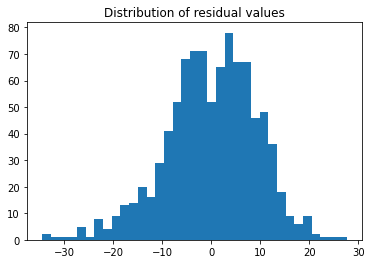

In [48]:
# Plotting the residuals of the model 1.1
plt.figure()
plt.hist(line_regression2_results.resid, bins = 35)
plt.title('Distribution of residual values')

plt.show()

The distribution of the residuals look normally distributed, however lets run a shapiro-wilks test to double check.

In [49]:
# Calculating the shapiro test statisic and its p-value
print("Shapiro-Wilk Test: ", stats.shapiro(line_regression2_results.resid))

Shapiro-Wilk Test:  ShapiroResult(statistic=0.9892286658287048, pvalue=2.3780019091645954e-06)


The p-value of the shapiro wilk test is smaller than 0.05, therefore we reject the null hypothesis that the model is normally distributed.

Let's try another visualization with a Q-Q plot.

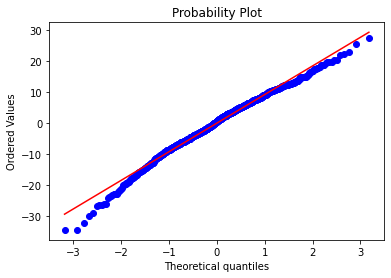

In [50]:
# Normal Q-Q plot

plt.figure()
stats.probplot(line_regression2_results.resid, dist="norm", plot = plt);
plt.show()

Although there are some skewed values in the tails of the distribution, overall the residual distribution looks normal.

## 3.4 Homoscedasticity

Assumptions for homoscedasticity include:

* The variance of residual is the same

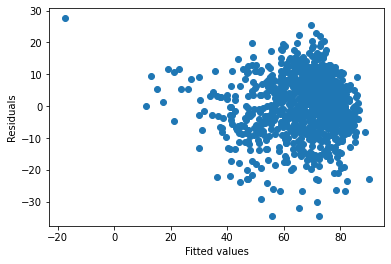

In [51]:
# Plot the residuals and the predicted values
plt.figure()
plt.scatter(line_regression2_results.fittedvalues, line_regression2_results.resid)
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.show()

For the most part, the residuals are clumped together, however there are a few outliers. 

Let's try fitting a logistic regression model.

## Logistic Regression Model

As we are interested in the 2016 election data, first I will filter the `cleaned_demovotes_df` by year 2016.
As the target (dependent) variable will be the `party` column, I will also convert this column to binary values, and rename this column to `voted_republican`. The independent variable(s) will be every other numerical type column in the dataset:

* `candidatevotes`
* `totalvotes`
* `relative_votes`
* `total_population`
* `citizen_voting_age_population`
* `white_pct`                             
* `black_pct`                              
* `hispanic_pct`                            
* `foreign_born_pct`                        
* `female_pct`                              
* `age_29_and_under_pct`                    
* `age_65_and_older_pct`                 
* `median_household_income`                 
* `unemployed_pct_in_civilian_labor_force`  
* `less_than_highschool_pct`                
* `less_than_college_pct`                   
* `rural population_pct`  

The values in the `voted_republican` column correspond to:
* `0` = voted democrats
* `1` = voted republican


In [52]:
# Filter by 2016 year
cleaned_2016 = cleaned_demovotes_df.loc[(cleaned_demovotes_df['year'] == 2016)]

# Convert party to binary value, and rename to 'voted_republican'
cleaned_2016['party'] = cleaned_2016['party'].map({'democrat': 0,'republican': 1})
cleaned_2016.rename({'party': 'voted_republican'}, axis=1, inplace=True)

<ipython-input-52-7aa362a1486b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_2016['party'] = cleaned_2016['party'].map({'democrat': 0,'republican': 1})
C:\Users\Sam\anaconda31\anaconda3\lib\site-packages\pandas\core\frame.py:4296: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [53]:
# Assign predictor and target variables.

# Predictor variable
X = cleaned_2016.drop(columns = ['county','candidate','state','voted_republican','year','FIPS'])
# Target variable
y = cleaned_2016['voted_republican']

# Double check shape of variables
print(X.shape, y.shape)



(1866, 17) (1866,)


In [54]:
# Add constant
X_constant = sm.add_constant(X, has_constant='add')
# sanity check, had issues with const showing, so added the 'has_constant' condition to force add the constant.
X_constant

,const,candidatevotes,totalvotes,relative_votes,total_population,citizen_voting_age_population,white_pct,black_pct,hispanic_pct,foreign_born_pct,female_pct,age_29_and_under_pct,age_65_and_older_pct,median_household_income,unemployed_pct_in_civilian_labor_force,less_than_highschool_pct,less_than_college_pct,rural population_pct
1866,1.0,5784.0,13900,42.445146,34018.0,26480.0,56.743489,40.478570,0.435064,0.990652,52.087130,35.872185,18.387324,36027.0,7.489945,19.736732,87.515721,49.148034
1867,1.0,7843.0,13900,57.554854,34018.0,26480.0,56.743489,40.478570,0.435064,0.990652,52.087130,35.872185,18.387324,36027.0,7.489945,19.736732,87.515721,49.148034
1868,1.0,1547.0,10733,14.733333,25897.0,20505.0,91.871645,4.606711,3.823285,0.725953,50.252925,32.710353,20.322817,38925.0,5.855731,18.717235,86.038301,85.736273
1869,1.0,8953.0,10733,85.266667,25897.0,20505.0,91.871645,4.606711,3.823285,0.725953,50.252925,32.710353,20.322817,38925.0,5.855731,18.717235,86.038301,85.736273
1870,1.0,5749.0,13031,44.603926,24847.0,19195.0,53.177446,45.494426,0.173059,0.466857,52.758884,36.604017,18.062543,32735.0,17.083333,18.957819,87.862766,75.980335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3727,1.0,11115.0,15095,81.428571,29083.0,22710.0,90.606196,0.828663,5.618403,2.685418,50.802875,35.532785,19.444349,61185.0,3.786077,5.748368,67.998625,44.240383
3728,1.0,644.0,4390,15.889465,10032.0,7470.0,91.646730,0.000000,7.814992,2.053429,46.949761,36.393541,13.337321,76004.0,2.786971,4.658830,75.645069,100.000000
3729,1.0,3409.0,4390,84.110535,10032.0,7470.0,91.646730,0.000000,7.814992,2.053429,46.949761,36.393541,13.337321,76004.0,2.786971,4.658830,75.645069,100.000000
3730,1.0,532.0,3814,15.451641,8351.0,6135.0,82.397318,0.790325,13.962400,3.783978,51.359119,34.774279,19.650341,46212.0,7.441860,12.577108,78.923920,35.954529


In [55]:
# Instantiate model
republican_logit = sm.Logit(y, X_constant)
# Fit model
republican_logit_results = republican_logit.fit()
# Print Summary
republican_logit_results.summary()

Optimization terminated successfully.
         Current function value: 0.320322
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:       voted_republican   No. Observations:                 1866
Model:                          Logit   Df Residuals:                     1848
Method:                           MLE   Df Model:                           17
Date:                Mon, 03 May 2021   Pseudo R-squ.:                  0.5379
Time:                        17:53:07   Log-Likelihood:                -597.72
converged:                       True   LL-Null:                       -1293.4
Covariance Type:            nonrobust   LLR p-value:                1.097e-285
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                     -7.0493      3.186     -2.213      0.027     -13.293      -0.806
candidatevotes                         -8.008e-05   8.51e-06     -9.414      0.000   -9.68e-05   -6.34e-05
totalvotes                              3.776e-05   7.78e-06      4.856      0.000    2.25e-05     5.3e-05
relative_votes                             0.1326      0.006     22.842      0.000       0.121       0.144
total_population                       -1.183e-07   4.24e-06     -0.028      0.978   -8.43e-06     8.2e-06
citizen_voting_age_population           2.681e-07   7.77e-06      0.034      0.972    -1.5e-05    1.55e-05
white_pct                                 -0.0001      0.010     -0.011      0.991      -0.019       0.019
black_pct                                  0.0009      0.010      0.086      0.931      -0.019       0.020
hispanic_pct                              -0.0009      0.012     -0.076      0.940      -0.024       0.022
foreign_born_pct                           0.0047      0.027      0.174      0.862      -0.048       0.058
female_pct                                 0.0037      0.042      0.088      0.930      -0.079       0.086
age_29_and_under_pct                      -0.0004      0.030     -0.012      0.990      -0.059       0.058
age_65_and_older_pct                       0.0026      0.041      0.063      0.950      -0.077       0.082
median_household_income                 4.506e-07   1.13e-05      0.040      0.968   -2.18e-05    2.27e-05
unemployed_pct_in_civilian_labor_force    -0.0002      0.033     -0.006      0.996      -0.064       0.064
less_than_highschool_pct                  -0.0006      0.025     -0.022      0.982      -0.050       0.049
less_than_college_pct                      0.0021      0.014      0.150      0.881      -0.026       0.030
rural population_pct                    7.242e-05      0.004      0.019      0.985      -0.007       0.007
==========================================================================================================
"""

From the logistic regression model, it seems that `candidatevotes`, `relative_votes` and `totalvotes` are the only statistically significant variables for this model. Let's evaluate our model.

## Evaluate Logistic Regression Model

We can determine how effective our model is by looking at its accuracy.

In [56]:
# Get probabilistic output
y_proba = republican_logit_results.predict(X_constant)
y_proba

1866    0.288113
1867    0.717783
1868    0.012171
1869    0.987387
1870    0.343990
          ...   
3727    0.978605
3728    0.011650
3729    0.987644
3730    0.011089
3731    0.988775
Length: 1866, dtype: float64

In [57]:
# Convert output into binary values
y_pred = np.where(y_proba >= 0.5, 1, 0)
y_pred

array([0, 1, 0, ..., 1, 0, 1])

In [60]:
# Calculate accuracy
(y_pred == y).mean()*100

86.81672025723472

This means that our model is 86.87% accurate when looking at the entire dataset.

Now, lets create a dataframe that displays coefficient, pvalue, and odds ratio of each variable. Then, filter by p-value < 0.05 to view the statistically significant variables.

In [59]:
# Create coefficient dataframe with coefficients, p-values, and odds ratio
coefficient_df = pd.DataFrame({"Coefficient": republican_logit_results.params,
                             "p-value": republican_logit_results.pvalues,
                             "odds ratio": np.exp(republican_logit_results.params)})
# Filter by p value < 0.05
significant_coefficient_df = coefficient_df[coefficient_df['p-value'] < 0.05]
significant_coefficient_df

,Coefficient,p-value,odds ratio
const,-7.049337,2.690702e-02,0.000868
candidatevotes,-0.000080,4.784564e-21,0.999920
totalvotes,0.000038,1.198130e-06,1.000038
relative_votes,0.132560,1.759224e-115,1.141748


A simple way to interpret the coefficient and odds ratio is as follows:

For logistic regression, we say that if we have a coefficient of value $\beta_i$, then a one unit increase in $x_i$ will increase the odds ratio by a factor of $e^{\beta_i}$

The math calculations for odds ratio has already been performed and listed in the table above.

Using `relative_votes` as an example:

* $\beta_i = 0.132560$

* odds ratio is 1.141748

If we have one unit increase in `relative_votes`, then the odds now increase by 1.141748.